<a href="https://colab.research.google.com/github/farzadmohseni-ir/heart-disease-prediction/blob/main/Prediction_of_Heart_Disease_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📄 Article Overview

This notebook analyzes **Article #19** titled:  
**"Prediction of Heart Disease UCI Dataset Using Machine Learning Algorithms"**

The article is reviewed with the following expectations:

---

## 🎯 Objectives

1. Implement and compare different machine learning models.  
2. Analyze the predictive role of features such as **FBS**, **Chol**, and **Age**.  
3. Compare **ensemble methods** with individual algorithms.  
4. Design a simple **screening tool** for physicians.

---

## ❓ Analytical Questions

1. Why did **SVM** perform better than other models?  
2. Do the selected features truly reflect **cardiac risk**?

---


# 💓 Heart Disease Prediction — Dataset Overview

This project implements the research article:  
**“Prediction of Heart Disease UCI Dataset Using Machine Learning Algorithms”**  
based on the **UCI Cleveland Heart Disease Dataset**.

---

### 📁 Dataset Source:
- [UCI Repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)
- [Kaggle Link](https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci)

---

### 📊 Attribute Description (13 Features + 1 Target)

| Feature | Description |
|--------|-------------|
| `age` | Age in years |
| `sex` | Gender (1 = male; 0 = female) |
| `cp` | Chest pain type (0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic) |
| `trestbps` | Resting blood pressure (mm Hg) |
| `chol` | Serum cholesterol (mg/dl) |
| `fbs` | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) |
| `restecg` | Resting ECG (0: normal, 1: ST-T abnormality, 2: left ventricular hypertrophy) |
| `thalach` | Maximum heart rate achieved |
| `exang` | Exercise induced angina (1 = yes; 0 = no) |
| `oldpeak` | ST depression induced by exercise |
| `slope` | Slope of ST segment (0: upsloping, 1: flat, 2: downsloping) |
| `ca` | Number of major vessels (0–3) colored by fluoroscopy |
| `thal` | Thalassemia (0: normal, 1: fixed defect, 2: reversible defect) |
| `condition` | Target class (0 = no disease, 1 = disease) |

---

In [1]:
# Import Required Libraries

# Data Handling
import pandas as pd         # for data manipulation
import numpy as np          # for numerical operations

# Visualization
import matplotlib.pyplot as plt     # for plotting charts
import seaborn as sns               # for attractive statistical plots

# Preprocessing
from sklearn.preprocessing import StandardScaler    # for feature scaling
from sklearn.model_selection import train_test_split  # to split dataset

# Machine Learning Models
from sklearn.svm import SVC                     # Support Vector Machine
from sklearn.naive_bayes import GaussianNB      # Naive Bayes Classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.tree import DecisionTreeClassifier     # Decision Tree
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors
from sklearn.neural_network import MLPClassifier     # Artificial Neural Network

# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# Warnings Handling
import warnings
warnings.filterwarnings('ignore')   # Suppress warnings for clean output

# Plotting Style
sns.set_style("whitegrid")      # Seaborn plotting style
sns.set_palette("Set2")         # Seaborn color palette

In [2]:
# Install gdown
!pip install -q gdown

# Import required libraries
import gdown
import pandas as pd

# Define file ID and desired output file name
file_id = '1mmR6tvN9aVCaMANIePyUKQplkG1rdbdL'
output = 'uci_heart_disease_dataset.csv'

# Download CSV file from Google Drive
gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)

# Load the dataset using pandas
df = pd.read_csv(output)

# Display the first few rows
df.head()

Downloading...
From: https://drive.google.com/uc?id=1mmR6tvN9aVCaMANIePyUKQplkG1rdbdL
To: /content/uci_heart_disease_dataset.csv
100%|██████████| 11.1k/11.1k [00:00<00:00, 22.5MB/s]


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0

In [3]:
# Display the list of all column names
print("List of all column names in the dataset:\n")
print(df.columns.tolist())

List of all column names in the dataset:

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition']


In [4]:
# Retrieve the number of rows (samples) and columns (features) in the dataset
rows, cols = df.shape

# Print dataset shape information in a structured format
print(f"Total number of samples (rows): {rows}\n")
print(f"Total number of features (columns): {cols}")

Total number of samples (rows): 297

Total number of features (columns): 14


In [5]:
# Check the data types of each column

print("Data types of all columns in the dataset:\n")
df.dtypes

Data types of all columns in the dataset:



age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

In [6]:
# Get a concise summary of the DataFrame

print("Summary of the dataset:\n")
df.info()

Summary of the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [7]:
# Check for duplicate rows in the dataset
duplicate_rows = df.duplicated()

# Count how many duplicate rows exist
num_duplicates = duplicate_rows.sum()

# Print the result
print(f"Number of duplicate rows in the dataset: {num_duplicates}")

Number of duplicate rows in the dataset: 0


In [8]:
# Check for all types of missing values: NaN, empty string, and '?'

# Count standard missing values (NaN)
nan_count = df.isnull().sum()

# Count empty string values
empty_str_count = (df == '').sum()

# Count cells with question mark '?'
question_mark_count = (df == '?').sum()

# Combine all into a single DataFrame
missing_summary = pd.DataFrame({
    'NaN Count': nan_count,
    'Empty String Count': empty_str_count,
    "'?' Count": question_mark_count
})

# Total suspicious values per column
missing_summary['Total Suspect Values'] = missing_summary.sum(axis=1)

# Display the result
print(" Missing or suspicious values summary:\n")
display(missing_summary)

# Total in the entire dataset
print("\n Total suspicious cells in entire dataset:", missing_summary['Total Suspect Values'].sum())

 Missing or suspicious values summary:



NaN Count  Empty String Count  '?' Count  Total Suspect Values
age                0                   0          0                     0
sex                0                   0          0                     0
cp                 0                   0          0                     0
trestbps           0                   0          0                     0
chol               0                   0          0                     0
fbs                0                   0          0                     0
restecg            0                   0          0                     0
thalach            0                   0          0                     0
exang              0                   0          0                     0
oldpeak            0                   0          0                     0
slope              0                   0          0                     0
ca                 0                   0          0                     0
thal               0                   0          0                     0
condition          0                   0          0                     0


 Total suspicious cells in entire dataset: 0


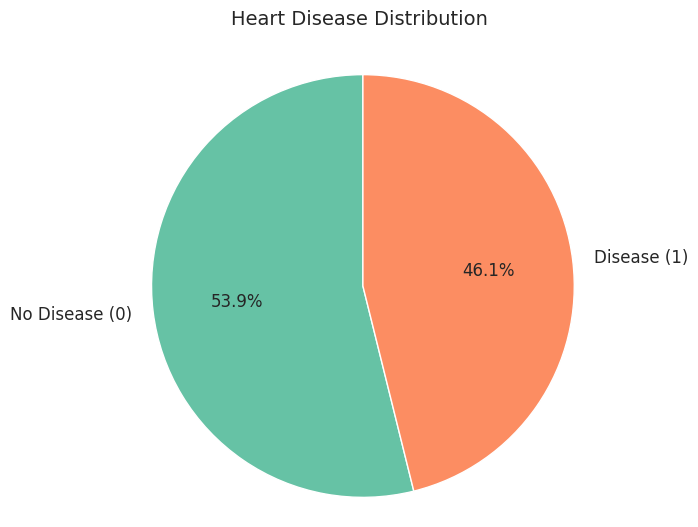

No Disease (0): 160 patients (53.9%)
Disease (1): 137 patients (46.1%)


In [9]:
# Visualize distribution of heart disease in the dataset

# Count the number of cases for each class
disease_counts = df['condition'].value_counts().sort_index()

# Map numeric labels to text for better visualization
labels = ['No Disease (0)', 'Disease (1)']
sizes = disease_counts.values
colors = ['#66c2a5', '#fc8d62']

# Calculate percentages
percentages = 100 * sizes / sizes.sum()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
plt.title('Heart Disease Distribution \n', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

# Print exact numbers
for i in range(len(labels)):
    print(f"{labels[i]}: {sizes[i]} patients ({percentages[i]:.1f}%)")

In [10]:
# Display descriptive statistics of all numerical features

# Only show statistics for numerical columns
print("Descriptive statistics for numeric features:\n")
df.describe().T

Descriptive statistics for numeric features:



count        mean        std    min    25%    50%    75%    max
age        297.0   54.542088   9.049736   29.0   48.0   56.0   61.0   77.0
sex        297.0    0.676768   0.468500    0.0    0.0    1.0    1.0    1.0
cp         297.0    2.158249   0.964859    0.0    2.0    2.0    3.0    3.0
trestbps   297.0  131.693603  17.762806   94.0  120.0  130.0  140.0  200.0
chol       297.0  247.350168  51.997583  126.0  211.0  243.0  276.0  564.0
fbs        297.0    0.144781   0.352474    0.0    0.0    0.0    0.0    1.0
restecg    297.0    0.996633   0.994914    0.0    0.0    1.0    2.0    2.0
thalach    297.0  149.599327  22.941562   71.0  133.0  153.0  166.0  202.0
exang      297.0    0.326599   0.469761    0.0    0.0    0.0    1.0    1.0
oldpeak    297.0    1.055556   1.166123    0.0    0.0    0.8    1.6    6.2
slope      297.0    0.602694   0.618187    0.0    0.0    1.0    1.0    2.0
ca         297.0    0.676768   0.938965    0.0    0.0    0.0    1.0    3.0
thal       297.0    0.835017   0.956690    0.0    0.0    0.0    2.0    2.0
condition  297.0    0.461279   0.499340    0.0    0.0    0.0    1.0    1.0

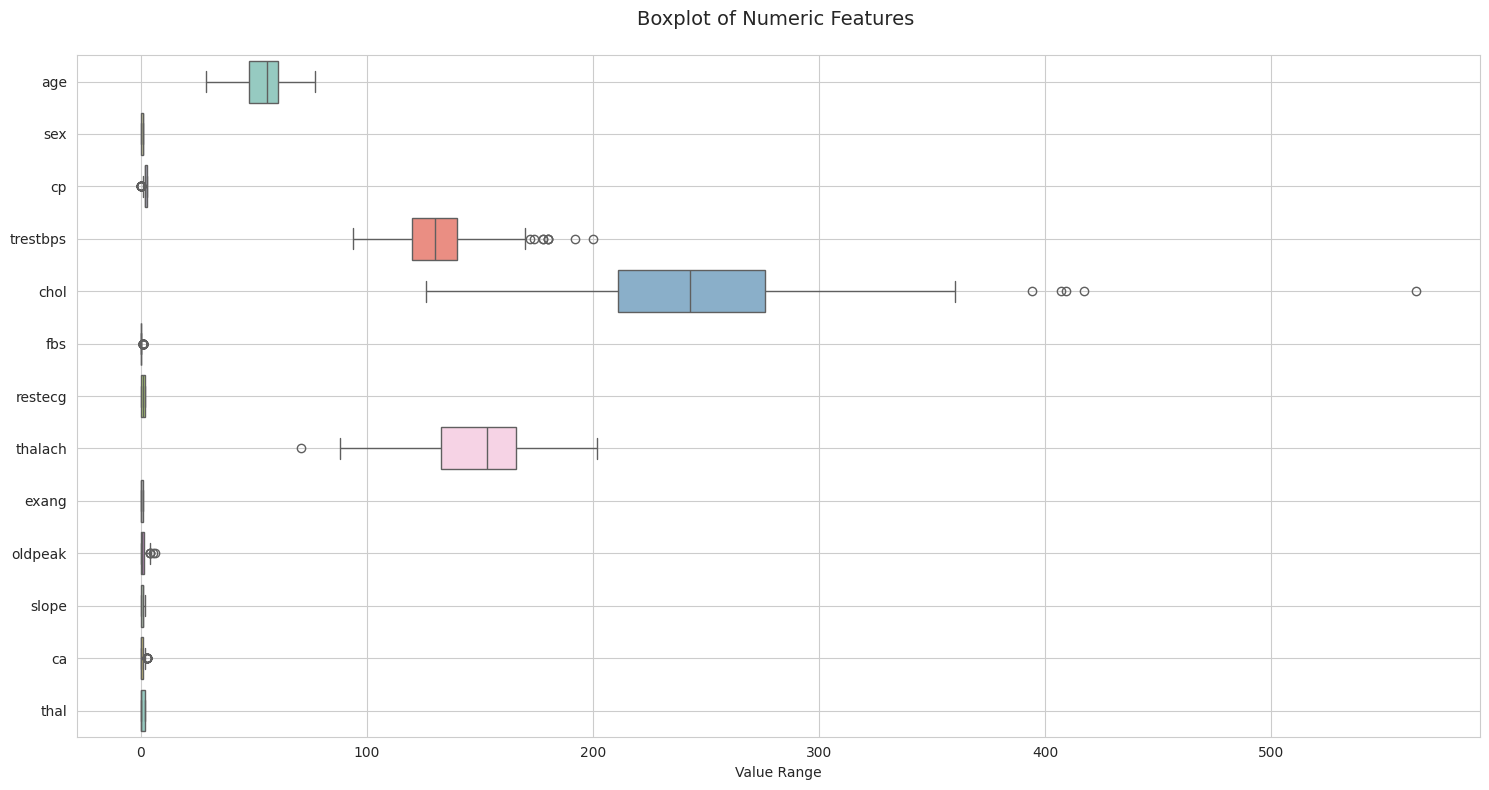

In [11]:
# Draw boxplots to visually detect outliers

import matplotlib.pyplot as plt
import seaborn as sns

# Exclude the target column
numeric_features = df.drop(columns=['condition']).select_dtypes(include=['int64', 'float64']).columns

# Set the figure size
plt.figure(figsize=(15, 8))

# Draw boxplot
sns.boxplot(data=df[numeric_features], orient='h', palette="Set3")

# Title and layout
plt.title("Boxplot of Numeric Features \n", fontsize=14)
plt.xlabel("Value Range")
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
# Detect outliers using IQR for all numeric features (excluding 'condition')

# Create an empty dictionary to store results
outlier_summary = {}

# Loop through each numeric feature
for col in df.drop(columns=['condition']).select_dtypes(include=['int64', 'float64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = outliers.shape[0]

    outlier_summary[col] = outlier_count

# Convert to DataFrame for better readability
import pandas as pd
outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier Count'])
outlier_df = outlier_df.sort_values(by='Outlier Count', ascending=False)

# Display result
print("Number of outliers per feature (using IQR method):\n")
display(outlier_df)

Number of outliers per feature (using IQR method):



Outlier Count
fbs                  43
cp                   23
ca                   20
trestbps              9
chol                  5
oldpeak               5
thalach               1
sex                   0
age                   0
exang                 0
restecg               0
slope                 0
thal                  0

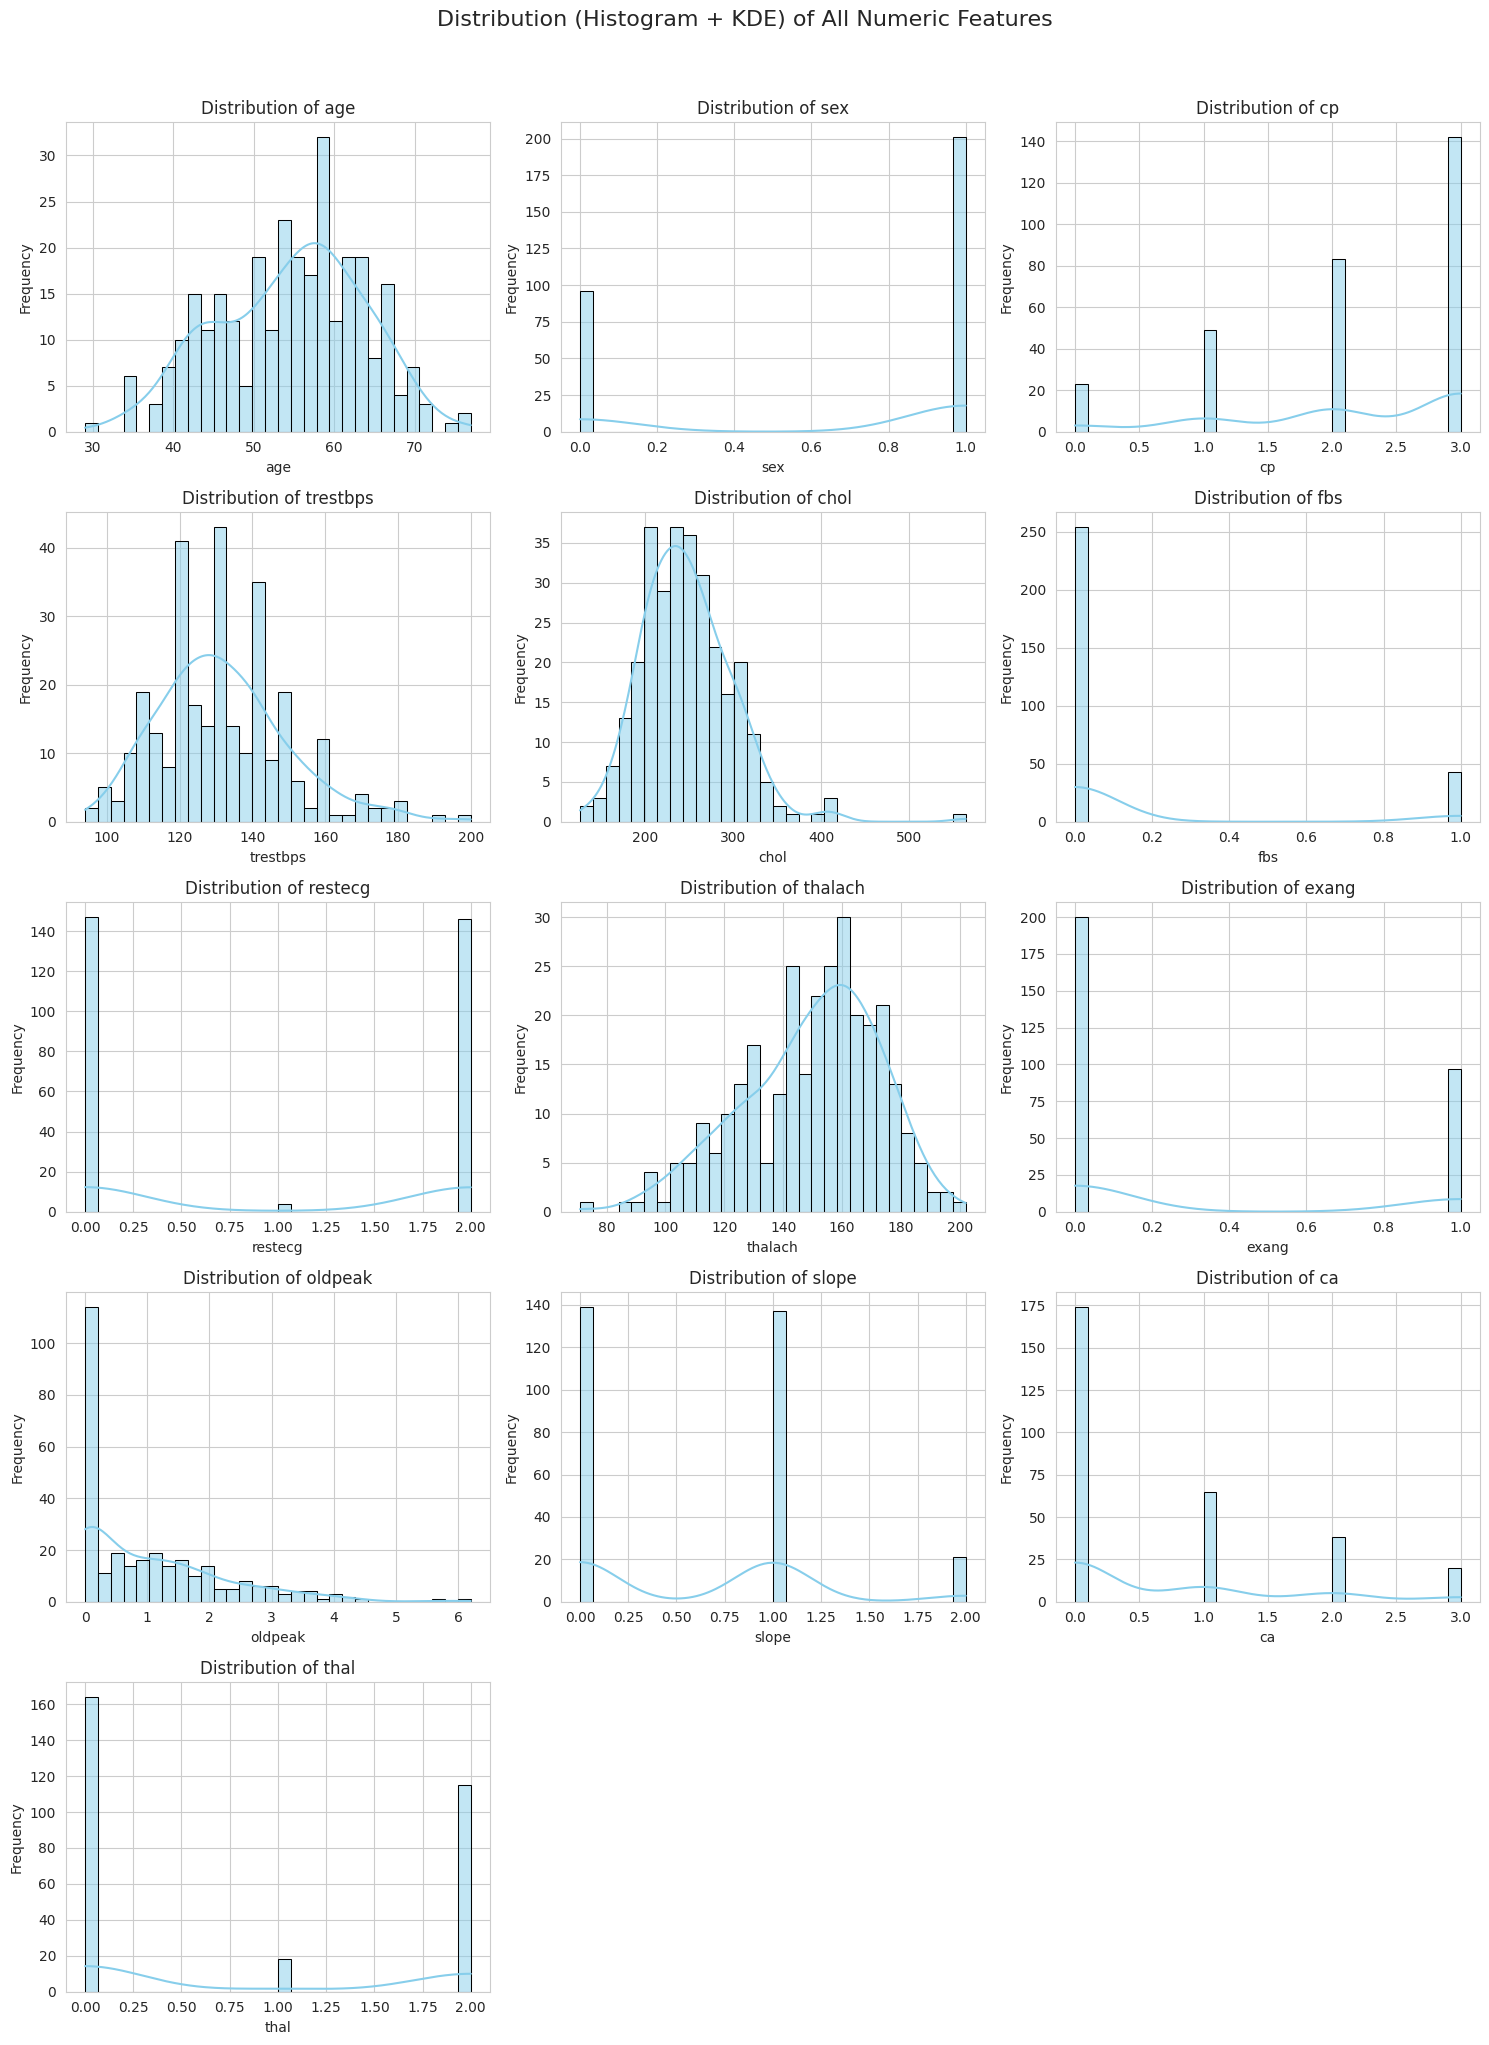

In [13]:
# Plot histogram and KDE for all numeric features (except 'condition')

import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric features (excluding 'condition')
features = df.drop(columns=['condition']).select_dtypes(include=['int64', 'float64']).columns

# Set the number of plots
n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols

# Set plot size and layout
plt.figure(figsize=(n_cols * 5, n_rows * 4))

# Title for the whole figure
plt.suptitle('Distribution (Histogram + KDE) of All Numeric Features', fontsize=16, y=1.02)

for i, col in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

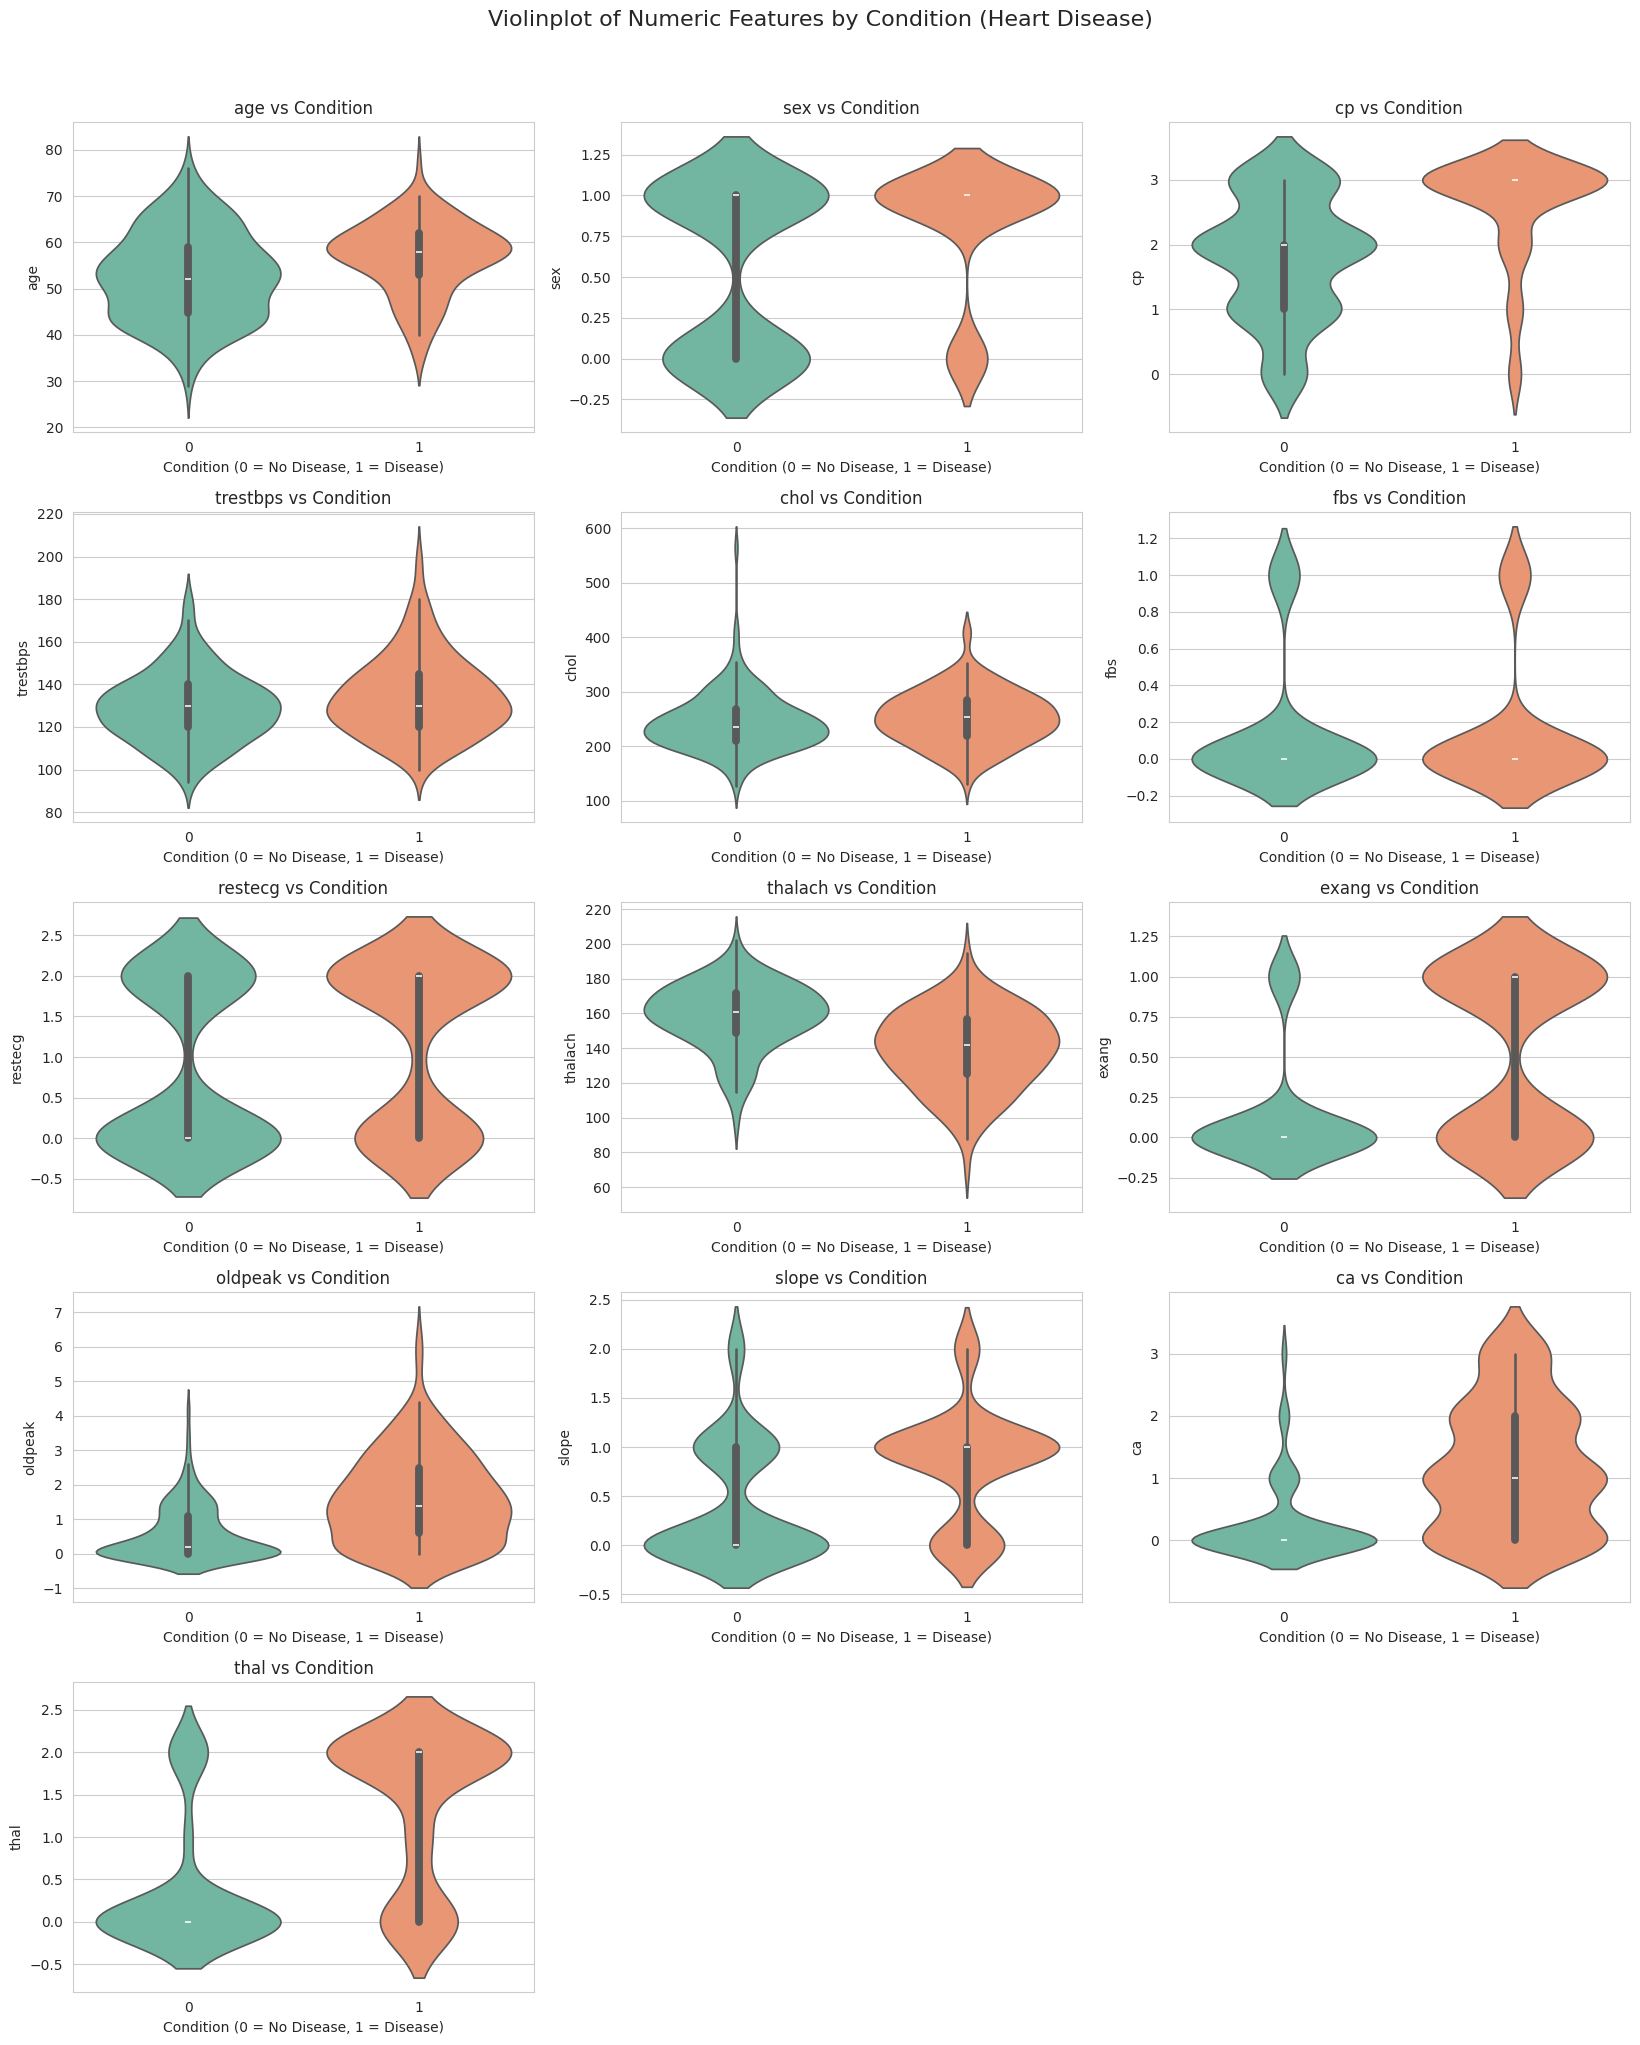

In [14]:
# Violinplot of each numerical feature vs target (condition)

import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features only (exclude 'condition')
features = df.drop(columns=['condition']).select_dtypes(include=['int64', 'float64']).columns

# Plot violinplots
n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols

# Set up the figure
plt.figure(figsize=(n_cols * 5.5, n_rows * 4))

# Add main title
plt.suptitle('Violinplot of Numeric Features by Condition (Heart Disease)', fontsize=16, y=1.02)

for i, col in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.violinplot(x='condition', y=col, data=df, palette="Set2", inner="box")
    plt.title(f'{col} vs Condition')
    plt.xlabel("Condition (0 = No Disease, 1 = Disease)")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

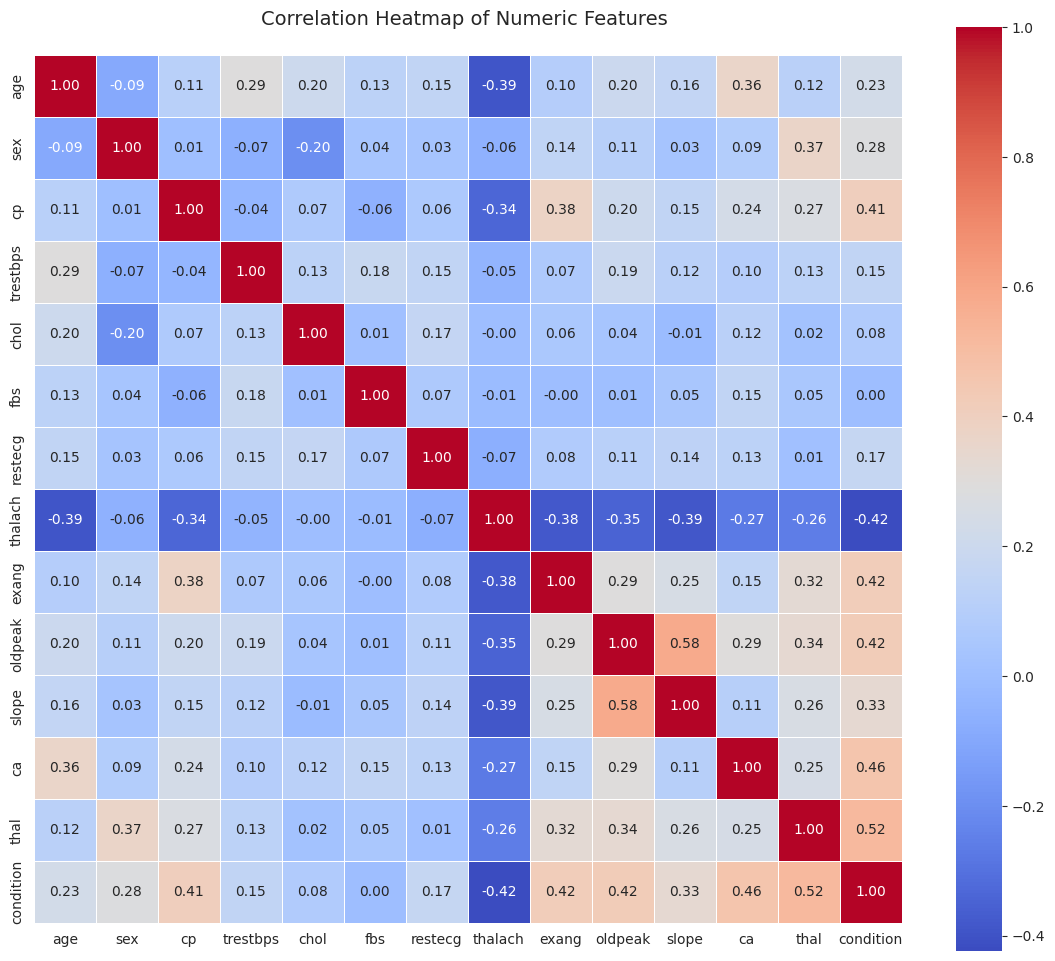

In [15]:
# Correlation heatmap of all numerical features

import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Draw heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", square=True)

# Title
plt.title('Correlation Heatmap of Numeric Features \n', fontsize=14)
plt.show()

In [16]:
# One-Hot Encoding for Categorical Features in Heart Disease Dataset

import pandas as pd

# Copy the original dataframe to avoid modifying it directly
df_encoded = df.copy()

# Identify categorical columns (non-binary nominal features)
categorical_cols = ['cp', 'restecg', 'slope', 'thal']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)

# Convert boolean columns to integers (True -> 1, False -> 0)
df_encoded = df_encoded.astype(int)

# View the resulting dataframe
print("One-Hot Encoding completed and converted to numeric. New shape:", df_encoded.shape ,"\n")
df_encoded.head()

One-Hot Encoding completed and converted to numeric. New shape: (297, 19) 



age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  ca  condition  \
0   69    1       160   234    1      131      0        0   1          0   
1   69    0       140   239    0      151      0        1   2          0   
2   66    0       150   226    0      114      0        2   0          0   
3   65    1       138   282    1      174      0        1   1          1   
4   64    1       110   211    0      144      1        1   0          0   

   cp_1  cp_2  cp_3  restecg_1  restecg_2  slope_1  slope_2  thal_1  thal_2  
0     0     0     0          0          1        1        0       0       0  
1     0     0     0          0          0        0        0       0       0  
2     0     0     0          0          0        0        1       0       0  
3     0     0     0          0          1        1        0       0       0  
4     0     0     0          0          1        1        0       0       0

In [17]:
# Separate features (X) and target (y)

# X will include all columns except 'condition'
# y will be the 'condition' column (our label: 0 = No Disease, 1 = Disease)

X = df_encoded.drop('condition', axis=1)
y = df_encoded['condition']

# ✅ Confirm the shapes
print("Features shape (X):", X.shape)
print("Target shape (y):", y.shape)

Features shape (X): (297, 18)
Target shape (y): (297,)


In [18]:
# Split the dataset into training and testing sets (80/20, Stratified)

from sklearn.model_selection import train_test_split
import pandas as pd

# Perform an 80/20 split while preserving class distribution (stratification)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # 20% for testing, 80% for training
    stratify=y,             # Ensures proportional class distribution in both sets
    random_state=42         # For reproducibility
)

# Create a summary table to visualize the split statistics
split_summary = {
    "Subset": ["Training Set", "Test Set"],
    "Samples": [X_train.shape[0], X_test.shape[0]],            # Number of samples
    "Features": [X_train.shape[1], X_test.shape[1]],           # Number of features (should be the same)
    "Class 0 (%)": [
        round(y_train.value_counts(normalize=True)[0] * 100, 2),
        round(y_test.value_counts(normalize=True)[0] * 100, 2)
    ],
    "Class 1 (%)": [
        round(y_train.value_counts(normalize=True)[1] * 100, 2),
        round(y_test.value_counts(normalize=True)[1] * 100, 2)
    ]
}

# Convert dictionary to a DataFrame for a neat tabular view
split_df = pd.DataFrame(split_summary)

# Display the final result
print("Dataset Split Summary:\n")
display(split_df)

Dataset Split Summary:



Subset  Samples  Features  Class 0 (%)  Class 1 (%)
0  Training Set      237        18        54.01        45.99
1      Test Set       60        18        53.33        46.67

In [19]:
# Standardize the features using StandardScaler (mean = 0, std = 1)

from sklearn.preprocessing import StandardScaler
import numpy as np

# Double-check input types before scaling (for clarity and future debugging)
assert isinstance(X_train, (pd.DataFrame, np.ndarray)), "X_train must be a DataFrame or ndarray"
assert isinstance(X_test, (pd.DataFrame, np.ndarray)), "X_test must be a DataFrame or ndarray"

# Create and apply the scaler
scaler = StandardScaler()

# Fit the scaler on training data only (to prevent data leakage)
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)

# Confirm transformation success
print("Standardization completed successfully.")
print("Scaled training data shape:", X_train_scaled.shape)
print("Scaled test data shape    :", X_test_scaled.shape)

Standardization completed successfully.
Scaled training data shape: (237, 18)
Scaled test data shape    : (60, 18)


Fitting 10 folds for each of 15 candidates, totalling 150 fits
Best Parameters for SVM:
   → C      : 5
   → gamma  : 0.005
   → kernel : rbf

 Training Set Evaluation for SVM:



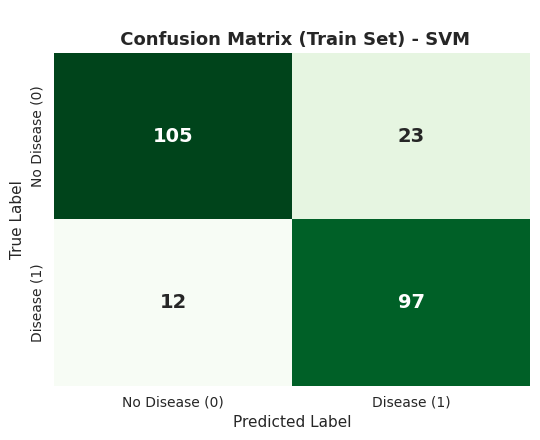

In [20]:
# SVM - Train Evaluation

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, make_scorer
)
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Compute class weights with slight emphasis on minority class (class 1 = disease)
classes = np.array([0, 1])
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
manual_weights = dict(zip(classes, weights))
manual_weights[1] *= 1.7  # Slightly increase weight for class 1 to improve recall without sacrificing precision

# Define hyperparameter grid (balanced: not too small, not too large)
param_grid = {
    'C': [0.1, 0.5, 1, 5, 10],
    'gamma': [0.001, 0.005, 0.01],
    'kernel': ['rbf']
}

# Set up stratified cross-validation to preserve class ratio
stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform grid search with F1 score as optimization criterion
grid_svm = GridSearchCV(
    estimator=SVC(random_state=42, class_weight=manual_weights, probability=True),
    param_grid=param_grid,
    scoring=make_scorer(f1_score),
    cv=stratified_cv,
    n_jobs=-1,
    verbose=1,
    refit=True
)

# Fit the model on the scaled training set
grid_svm.fit(X_train_scaled, y_train)

# Extract best model and predict on training data
svm_model = grid_svm.best_estimator_

# Print Best Parameters clearly
params = grid_svm.best_params_
print("Best Parameters for SVM:")
print(f"   → C      : {params['C']}")
print(f"   → gamma  : {params['gamma']}")
print(f"   → kernel : {params['kernel']}")

y_train_pred_svm = svm_model.predict(X_train_scaled)

# Compute performance metrics and confusion matrix
cm_train_svm = confusion_matrix(y_train, y_train_pred_svm)
TN, FP, FN, TP = cm_train_svm.ravel()

train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
train_precision_svm = precision_score(y_train, y_train_pred_svm)
train_recall_svm = recall_score(y_train, y_train_pred_svm)
train_specificity_svm = TN / (TN + FP)
train_f1_svm = f1_score(y_train, y_train_pred_svm)

# Store results and visualize metrics in styled table
results = {}
results['SVM'] = {
    'Train Accuracy': train_accuracy_svm,
    'Train Precision': train_precision_svm,
    'Train Recall': train_recall_svm,
    'Train Specificity': train_specificity_svm,
    'Train F1 Score': train_f1_svm,
    'Train Confusion Matrix': cm_train_svm
}

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [train_accuracy_svm, train_precision_svm, train_recall_svm, train_specificity_svm, train_f1_svm]
})

print("\n Training Set Evaluation for SVM:\n")
display(
    metrics_df.style
        .format({'Value': '{:.2%}'})
        .set_caption("Training Performance - SVM , (in %)")
        .background_gradient(cmap='Greens', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#cfe9ce'), ('font-weight', 'bold')]}
        ])
)

# Plot confusion matrix (Train Set)
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_train_svm, annot=True, fmt='d', cmap='Greens', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\n Confusion Matrix (Train Set) - SVM', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Test Set Evaluation for SVM:



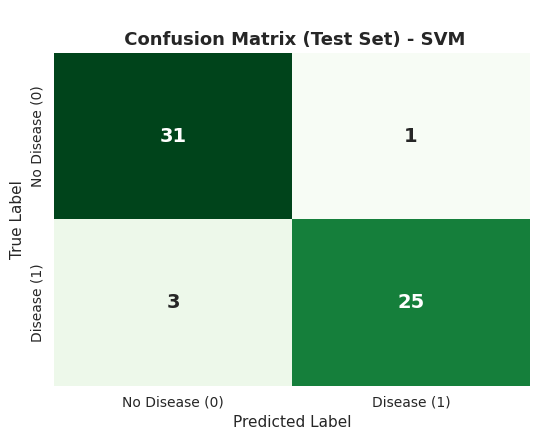

In [21]:
# SVM - Test Evaluation

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Use the optimized SVM model trained via GridSearchCV
y_test_pred_svm = svm_model.predict(X_test_scaled)

# Confusion Matrix
cm_test_svm = confusion_matrix(y_test, y_test_pred_svm)
TN, FP, FN, TP = cm_test_svm.ravel()

# Performance Metrics
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
test_precision_svm = precision_score(y_test, y_test_pred_svm)
test_recall_svm = recall_score(y_test, y_test_pred_svm)
test_specificity_svm = TN / (TN + FP)
test_f1_svm = f1_score(y_test, y_test_pred_svm)

# Save Test Results
results['SVM'].update({
    'Test Accuracy': test_accuracy_svm,
    'Test Precision': test_precision_svm,
    'Test Recall': test_recall_svm,
    'Test Specificity': test_specificity_svm,
    'Test F1 Score': test_f1_svm,
    'Test Confusion Matrix': cm_test_svm
})

# Show Styled Table
test_metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [test_accuracy_svm, test_precision_svm, test_recall_svm, test_specificity_svm, test_f1_svm]
})

print("Test Set Evaluation for SVM:\n")
display(
    test_metrics_df.style
        .format({'Value': '{:.2%}'})
        .set_caption("Test Performance - SVM , (in %)")
        .background_gradient(cmap='Greens', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#cfe9ce'), ('font-weight', 'bold')]}
        ])
)

# Plot Confusion Matrix
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_test_svm, annot=True, fmt='d', cmap='Greens', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\n Confusion Matrix (Test Set) - SVM', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [22]:
# Permutation Feature Importance for SVM (Train + Test) – All Metrics

from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, recall_score, precision_score, accuracy_score, f1_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, HTML
import numpy as np

# Set global float display format for better precision visibility
pd.options.display.float_format = '{:.8f}'.format

# Custom specificity metric function
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        return tn / (tn + fp) if (tn + fp) > 0 else 0
    return np.nan

# Reconstruct DataFrames from scaled data with proper column names
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Define scoring metrics to use in permutation importance
scoring_metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'Specificity': make_scorer(specificity_score),
    'F1 Score': make_scorer(f1_score)
}

# Color settings for bar visuals
importance_color_map = {
    'train': '#66bb6a',  # green
    'test': '#42a5f5'    # blue
}

std_color_map = {
    'train': '#c8e6c9',
    'test': '#bbdefb'
}

# Colors for zero and negative values
zero_color = '#ff1744'
negative_color = '#d50000'

# Function to highlight zero (light red) and negative (bold dark red) values
def highlight_negative_or_zero(val):
    if np.isclose(val, 0.0, atol=1e-8):
        return f'color: {zero_color}'
    elif val < 0:
        return f'color: {negative_color}; font-weight: bold'
    return ''

# Dictionary to store all importance results
perm_results_all = {}
all_models_perm_results = {}

# Iterate through each metric and compute permutation importances
for metric_name, scorer in scoring_metrics.items():

    # Permutation importance on training data
    perm_train = permutation_importance(
        estimator=svm_model,
        X=X_train_df,
        y=y_train,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # Permutation importance on test data
    perm_test = permutation_importance(
        estimator=svm_model,
        X=X_test_df,
        y=y_test,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # Format training results into DataFrame
    df_train = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': perm_train.importances_mean,
        'Std': perm_train.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # Format test results into DataFrame
    df_test = pd.DataFrame({
        'Feature': X_test.columns,
        'Importance': perm_test.importances_mean,
        'Std': perm_test.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # Store results
    perm_results_all[metric_name] = {'train': df_train, 'test': df_test}

    # Display header
    display(Markdown(f"## SVM – Permutation Feature Importances ({metric_name})"))

    # Render training table
    train_html = (
        df_train.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['train'], vmin=0)
            .bar(subset='Std', color=std_color_map['train'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"SVM (Train) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Render test table
    test_html = (
        df_test.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['test'], vmin=0)
            .bar(subset='Std', color=std_color_map['test'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"SVM (Test) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Display both tables side-by-side
    html_output = f"""
    <div style="display: flex; gap: 50px;">
        <div>{train_html}</div>
        <div>{test_html}</div>
    </div>
    """
    display(HTML(html_output))

# Save it to master dictionary
all_models_perm_results['SVM'] = perm_results_all

## SVM – Permutation Feature Importances (Accuracy)

## SVM – Permutation Feature Importances (Precision)

## SVM – Permutation Feature Importances (Recall)

## SVM – Permutation Feature Importances (Specificity)

## SVM – Permutation Feature Importances (F1 Score)

Model Configuration: Naive Bayes with priors = [0.35, 0.65]

 Training Set Evaluation for Naive Bayes: 



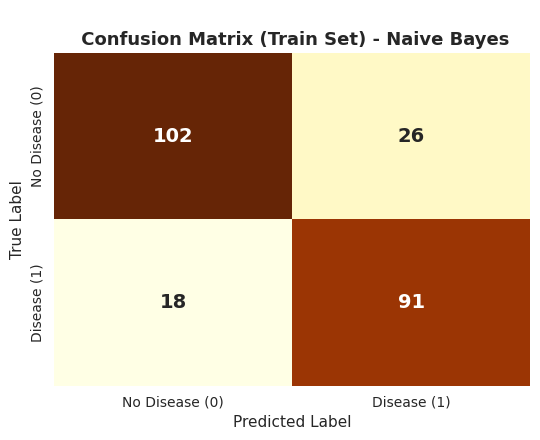

In [23]:
# Naive Bayes - Train Evaluation

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, make_scorer
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

# Define custom specificity scorer
def specificity_score(y_true, y_pred):
    tn = ((y_true == 0) & (y_pred == 0)).sum()
    fp = ((y_true == 0) & (y_pred == 1)).sum()
    return tn / (tn + fp) if (tn + fp) > 0 else 0

# Scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'specificity': make_scorer(specificity_score)
}

# Stratified 15-fold CV
cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

# Naive Bayes with adjusted class priors to favor positive class (disease)
nb_model = GaussianNB(priors=[0.35, 0.65])

# Perform cross-validation
cv_results = cross_validate(
    nb_model,
    X_train_scaled,
    y_train,
    cv=cv,
    scoring=scoring,
    return_train_score=False
)

# Average scores
train_accuracy_nb = np.mean(cv_results['test_accuracy'])
train_precision_nb = np.mean(cv_results['test_precision'])
train_recall_nb = np.mean(cv_results['test_recall'])
train_specificity_nb = np.mean(cv_results['test_specificity'])
train_f1_nb = np.mean(cv_results['test_f1'])

# Final model fit and confusion matrix
nb_model.fit(X_train_scaled, y_train)
y_train_pred_nb = nb_model.predict(X_train_scaled)
cm_train_nb = confusion_matrix(y_train, y_train_pred_nb)

# Save results (with Confusion Matrix included here)
results['Naive Bayes'] = {
    'Train Accuracy': train_accuracy_nb,
    'Train Precision': train_precision_nb,
    'Train Recall': train_recall_nb,
    'Train Specificity': train_specificity_nb,
    'Train F1 Score': train_f1_nb,
    'Train Confusion Matrix': cm_train_nb
}

# Display styled metrics table
train_metrics_df_nb = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [train_accuracy_nb, train_precision_nb, train_recall_nb, train_specificity_nb, train_f1_nb]
})

print("Model Configuration: Naive Bayes with priors =", [0.35, 0.65])
print("\n Training Set Evaluation for Naive Bayes: \n")
display(
    train_metrics_df_nb.style
        .format({'Value': '{:.2%}'})
        .set_caption("Training Performance - Naive Bayes , (in %)")
        .background_gradient(cmap='YlOrBr', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [['background-color', '#ffe5b4'], ['font-weight', 'bold']]}
        ])
)

# Plot confusion matrix
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_train_nb, annot=True, fmt='d', cmap='YlOrBr', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\n Confusion Matrix (Train Set) - Naive Bayes', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Test Set Evaluation for Naive Bayes:



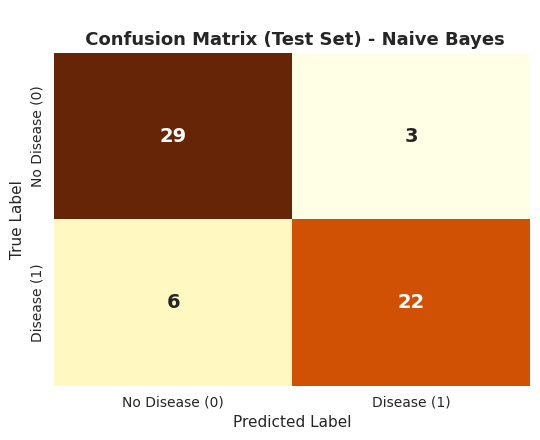

In [24]:
# Naive Bayes - Test Evaluation

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Refit the model on the entire training set
nb_model.fit(X_train_scaled, y_train)

# Predict on test set
y_test_pred_nb = nb_model.predict(X_test_scaled)

# Compute evaluation metrics
cm_test_nb = confusion_matrix(y_test, y_test_pred_nb)
TN, FP, FN, TP = cm_test_nb.ravel()

test_accuracy_nb = accuracy_score(y_test, y_test_pred_nb)
test_precision_nb = precision_score(y_test, y_test_pred_nb)
test_recall_nb = recall_score(y_test, y_test_pred_nb)
test_specificity_nb = TN / (TN + FP)
test_f1_nb = f1_score(y_test, y_test_pred_nb)

# Update results
results['Naive Bayes'].update({
    'Test Accuracy': test_accuracy_nb,
    'Test Precision': test_precision_nb,
    'Test Recall': test_recall_nb,
    'Test Specificity': test_specificity_nb,
    'Test F1 Score': test_f1_nb,
    'Test Confusion Matrix': cm_test_nb
})

# Styled metrics table
test_metrics_df_nb = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [test_accuracy_nb, test_precision_nb, test_recall_nb, test_specificity_nb, test_f1_nb]
})

print("Test Set Evaluation for Naive Bayes:\n")
display(
    test_metrics_df_nb.style
        .format({'Value': '{:.2%}'})
        .set_caption("Test Performance - Naive Bayes , (in %)")
        .background_gradient(cmap='YlOrBr', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
    {'selector': 'th', 'props': [['background-color', '#ffe5b4'], ['font-weight', 'bold']]}
])

)

# Confusion matrix heatmap
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_test_nb, annot=True, fmt='d', cmap='YlOrBr', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\n Confusion Matrix (Test Set) - Naive Bayes', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [25]:
# Permutation Feature Importance for Naive Bayes (Train + Test) – All Metrics

from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, recall_score, precision_score, accuracy_score, f1_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, HTML
import numpy as np

# Set global float display format
pd.options.display.float_format = '{:.8f}'.format

# Define custom specificity function
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        return tn / (tn + fp) if (tn + fp) > 0 else 0
    return np.nan

# Reconstruct DataFrames from scaled arrays
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Define all evaluation metrics
scoring_metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'Specificity': make_scorer(specificity_score),
    'F1 Score': make_scorer(f1_score)
}

# Color configuration for bar charts
importance_color_map = {
    'train': '#66bb6a',
    'test': '#42a5f5'
}

std_color_map = {
    'train': '#c8e6c9',
    'test': '#bbdefb'
}

zero_color = '#ff1744'
negative_color = '#d50000'

# Highlight zeros and negatives
def highlight_negative_or_zero(val):
    if np.isclose(val, 0.0, atol=1e-8):
        return f'color: {zero_color}'
    elif val < 0:
        return f'color: {negative_color}; font-weight: bold'
    return ''

# Dictionary to store results
perm_results_all = {}

# Loop through all metrics
for metric_name, scorer in scoring_metrics.items():

    # Permutation on training set
    perm_train = permutation_importance(
        estimator=nb_model,
        X=X_train_df,
        y=y_train,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # Permutation on test set
    perm_test = permutation_importance(
        estimator=nb_model,
        X=X_test_df,
        y=y_test,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # Format results for training
    df_train = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': perm_train.importances_mean,
        'Std': perm_train.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # Format results for test
    df_test = pd.DataFrame({
        'Feature': X_test.columns,
        'Importance': perm_test.importances_mean,
        'Std': perm_test.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # Store results in dictionary
    perm_results_all[metric_name] = {'train': df_train, 'test': df_test}

    # Display header
    display(Markdown(f"## Naive Bayes – Permutation Feature Importances ({metric_name})"))

    # Train HTML
    train_html = (
        df_train.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['train'], vmin=0)
            .bar(subset='Std', color=std_color_map['train'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"Naive Bayes (Train) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Test HTML
    test_html = (
        df_test.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['test'], vmin=0)
            .bar(subset='Std', color=std_color_map['test'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"Naive Bayes (Test) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Show tables side-by-side
    html_output = f"""
    <div style="display: flex; gap: 50px;">
        <div>{train_html}</div>
        <div>{test_html}</div>
    </div>
    """
    display(HTML(html_output))

# Save it to master dictionary
all_models_perm_results['Naive Bayes'] = perm_results_all

## Naive Bayes – Permutation Feature Importances (Accuracy)

## Naive Bayes – Permutation Feature Importances (Precision)

## Naive Bayes – Permutation Feature Importances (Recall)

## Naive Bayes – Permutation Feature Importances (Specificity)

## Naive Bayes – Permutation Feature Importances (F1 Score)

Best Parameters for Logistic Regression:
   → C       : 1
   → solver  : liblinear
   → penalty : l1
   → class_weight : balanced

 Training Set Evaluation for Logistic Regression:



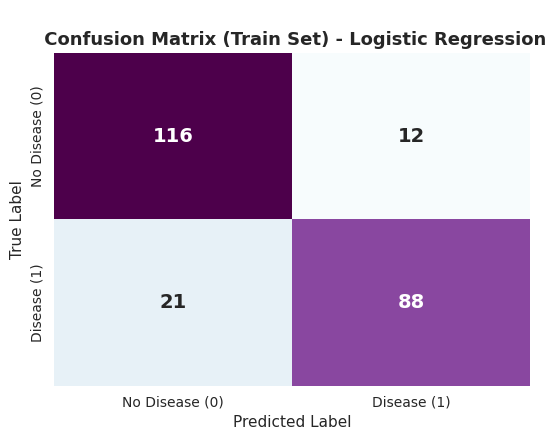

In [26]:
# Logistic Regression - Train Evaluation

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_validate, GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, make_scorer
)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Custom specificity scorer
def specificity_score(y_true, y_pred):
    tn = ((y_true == 0) & (y_pred == 0)).sum()
    fp = ((y_true == 0) & (y_pred == 1)).sum()
    return tn / (tn + fp) if (tn + fp) > 0 else 0

# Scoring dictionary
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'specificity': make_scorer(specificity_score)
}

# Stratified 10-fold CV
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'],
    'class_weight': ['balanced']
}

base_model_lr = LogisticRegression(max_iter=1000, random_state=42)

grid_search_lr = GridSearchCV(
    estimator=base_model_lr,
    param_grid=param_grid,
    scoring='f1',
    cv=cv,
    n_jobs=-1
)

grid_search_lr.fit(X_train_scaled, y_train)
best_model_lr = grid_search_lr.best_estimator_

params = grid_search_lr.best_params_
print("Best Parameters for Logistic Regression:")
print(f"   → C       : {params['C']}")
print(f"   → solver  : {params['solver']}")
print(f"   → penalty : {params['penalty']}")
print(f"   → class_weight : {params['class_weight']}")

# Cross-validation
cv_results_lr = cross_validate(
    best_model_lr,
    X_train_scaled,
    y_train,
    cv=cv,
    scoring=scoring,
    return_train_score=False
)

# Average metrics
train_accuracy_lr = np.mean(cv_results_lr['test_accuracy'])
train_precision_lr = np.mean(cv_results_lr['test_precision'])
train_recall_lr = np.mean(cv_results_lr['test_recall'])
train_specificity_lr = np.mean(cv_results_lr['test_specificity'])
train_f1_lr = np.mean(cv_results_lr['test_f1'])

# Final model fit and predictions
best_model_lr.fit(X_train_scaled, y_train)
y_train_pred_lr = best_model_lr.predict(X_train_scaled)
cm_train_lr = confusion_matrix(y_train, y_train_pred_lr)

# Save all to results
results['Logistic Regression'] = {
    'Train Accuracy': train_accuracy_lr,
    'Train Precision': train_precision_lr,
    'Train Recall': train_recall_lr,
    'Train Specificity': train_specificity_lr,
    'Train F1 Score': train_f1_lr,
    'Train Confusion Matrix': cm_train_lr
}

# Display styled metrics table
train_metrics_df_lr = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [train_accuracy_lr, train_precision_lr, train_recall_lr, train_specificity_lr, train_f1_lr]
})

print("\n Training Set Evaluation for Logistic Regression:\n")
display(
    train_metrics_df_lr.style
        .format({'Value': '{:.2%}'})
        .set_caption("Training Performance - Logistic Regression , (in %)")
        .background_gradient(cmap='BuPu', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([{'selector': 'th', 'props': [('background-color', '#e0d9f8'), ('font-weight', 'bold')]}])
)

# Confusion matrix plot
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_train_lr, annot=True, fmt='d', cmap='BuPu', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\n Confusion Matrix (Train Set) - Logistic Regression', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Test Set Evaluation for Logistic Regression:



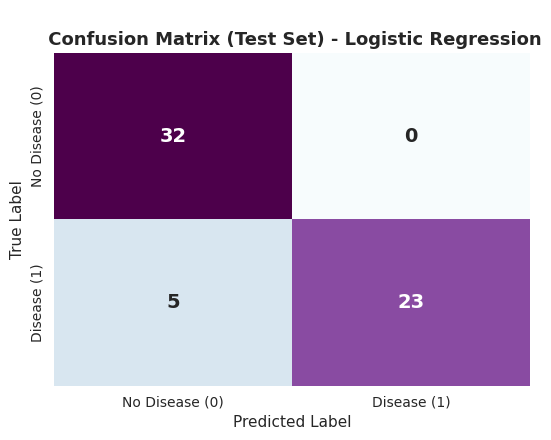

In [27]:
# Logistic Regression - Test Evaluation

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Predict on test set
y_test_pred_lr = best_model_lr.predict(X_test_scaled)

# Compute metrics
cm_test_lr = confusion_matrix(y_test, y_test_pred_lr)
TN, FP, FN, TP = cm_test_lr.ravel()

test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
test_precision_lr = precision_score(y_test, y_test_pred_lr)
test_recall_lr = recall_score(y_test, y_test_pred_lr)
test_specificity_lr = TN / (TN + FP)
test_f1_lr = f1_score(y_test, y_test_pred_lr)

# Update results
results['Logistic Regression'].update({
    'Test Accuracy': test_accuracy_lr,
    'Test Precision': test_precision_lr,
    'Test Recall': test_recall_lr,
    'Test Specificity': test_specificity_lr,
    'Test F1 Score': test_f1_lr,
    'Test Confusion Matrix': cm_test_lr
})

# Styled metrics table
test_metrics_df_lr = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [test_accuracy_lr, test_precision_lr, test_recall_lr, test_specificity_lr, test_f1_lr]
})

print("Test Set Evaluation for Logistic Regression:\n")
display(
    test_metrics_df_lr.style
        .format({'Value': '{:.2%}'})
        .set_caption("Test Performance - Logistic Regression , (in %)")
        .background_gradient(cmap='BuPu', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#e0d9f8'), ('font-weight', 'bold')]}
        ])
)

# Confusion Matrix Heatmap
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_test_lr, annot=True, fmt='d', cmap='BuPu', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\n Confusion Matrix (Test Set) - Logistic Regression', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [28]:
# Permutation Feature Importance for Logistic Regression (Train + Test) – All Metrics

from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, recall_score, precision_score, accuracy_score, f1_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, HTML
import numpy as np

# Set display format
pd.options.display.float_format = '{:.8f}'.format

# Custom specificity scorer
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        return tn / (tn + fp) if (tn + fp) > 0 else 0
    return np.nan

# Convert scaled arrays to DataFrames with column names
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Define evaluation metrics
scoring_metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'Specificity': make_scorer(specificity_score),
    'F1 Score': make_scorer(f1_score)
}

# Color configuration for bar charts
importance_color_map = {
    'train': '#66bb6a',
    'test': '#42a5f5'
}

std_color_map = {
    'train': '#c8e6c9',
    'test': '#bbdefb'
}

zero_color = '#ff1744'
negative_color = '#d50000'

# Highlight formatting for zero and negative
def highlight_negative_or_zero(val):
    if np.isclose(val, 0.0, atol=1e-8):
        return f'color: {zero_color}'
    elif val < 0:
        return f'color: {negative_color}; font-weight: bold'
    return ''

# Storage dictionaries
perm_results_all = {}

# Loop over metrics
for metric_name, scorer in scoring_metrics.items():

    # Permutation on training set
    perm_train = permutation_importance(
        estimator=best_model_lr,
        X=X_train_df,
        y=y_train,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # Permutation on test set
    perm_test = permutation_importance(
        estimator=best_model_lr,
        X=X_test_df,
        y=y_test,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # Format train results
    df_train = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': perm_train.importances_mean,
        'Std': perm_train.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # Format test results
    df_test = pd.DataFrame({
        'Feature': X_test.columns,
        'Importance': perm_test.importances_mean,
        'Std': perm_test.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # Save results
    perm_results_all[metric_name] = {'train': df_train, 'test': df_test}

    # Markdown heading
    display(Markdown(f"## Logistic Regression – Permutation Feature Importances ({metric_name})"))

    # Training Table
    train_html = (
        df_train.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['train'], vmin=0)
            .bar(subset='Std', color=std_color_map['train'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"Logistic Regression (Train) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Test Table
    test_html = (
        df_test.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['test'], vmin=0)
            .bar(subset='Std', color=std_color_map['test'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"Logistic Regression (Test) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Show side-by-side tables
    html_output = f"""
    <div style="display: flex; gap: 50px;">
        <div>{train_html}</div>
        <div>{test_html}</div>
    </div>
    """
    display(HTML(html_output))

# Save it to master dictionary
all_models_perm_results['Logistic Regression'] = perm_results_all

## Logistic Regression – Permutation Feature Importances (Accuracy)

## Logistic Regression – Permutation Feature Importances (Precision)

## Logistic Regression – Permutation Feature Importances (Recall)

## Logistic Regression – Permutation Feature Importances (Specificity)

## Logistic Regression – Permutation Feature Importances (F1 Score)

Neural Network Configuration (MLPClassifier):
   → hidden_layer_sizes: (64, 32)
   → activation        : relu
   → solver            : adam
   → alpha             : 0.001
   → early_stopping    : True
   → max_iter          : 500

 Training Set Evaluation for Neural Network: 



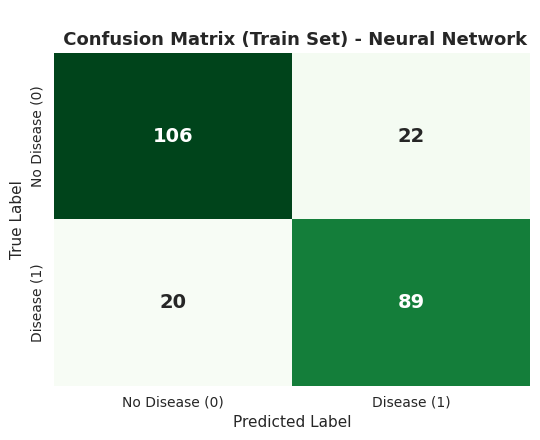

In [29]:
# Neural Network - Train Evaluation

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Train further improved Neural Network model
mlp_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),   # deeper network with 2 layers
    activation='relu',
    solver='adam',
    alpha=0.001,                   # less regularization
    early_stopping=True,          # stop if validation score stops improving
    max_iter=500,                 # allow more training
    random_state=42
)
mlp_model.fit(X_train_scaled, y_train)

# Predict on training set
y_train_pred_mlp = mlp_model.predict(X_train_scaled)

# Print configuration clearly
print("Neural Network Configuration (MLPClassifier):")
print(f"   → hidden_layer_sizes: {mlp_model.hidden_layer_sizes}")
print(f"   → activation        : {mlp_model.activation}")
print(f"   → solver            : {mlp_model.solver}")
print(f"   → alpha             : {mlp_model.alpha}")
print(f"   → early_stopping    : {mlp_model.early_stopping}")
print(f"   → max_iter          : {mlp_model.max_iter}")

# Compute training metrics
cm_train_mlp = confusion_matrix(y_train, y_train_pred_mlp)
TN, FP, FN, TP = cm_train_mlp.ravel()

train_accuracy_mlp = accuracy_score(y_train, y_train_pred_mlp)
train_precision_mlp = precision_score(y_train, y_train_pred_mlp)
train_recall_mlp = recall_score(y_train, y_train_pred_mlp)
train_specificity_mlp = TN / (TN + FP)
train_f1_mlp = f1_score(y_train, y_train_pred_mlp)

# Save in results dictionary
results['Neural Network'] = {
    'Train Accuracy': train_accuracy_mlp,
    'Train Precision': train_precision_mlp,
    'Train Recall': train_recall_mlp,
    'Train Specificity': train_specificity_mlp,
    'Train F1 Score': train_f1_mlp,
    'Train Confusion Matrix': cm_train_mlp
}

# Styled metrics table
train_metrics_df_mlp = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [train_accuracy_mlp, train_precision_mlp, train_recall_mlp, train_specificity_mlp, train_f1_mlp]
})

print("\n Training Set Evaluation for Neural Network: \n")
display(
    train_metrics_df_mlp.style
        .format({'Value': '{:.2%}'})
        .set_caption("Training Performance - Neural Network , (in %)")
        .background_gradient(cmap='Greens', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#d1f3d1'), ('font-weight', 'bold')]}
        ])
)

# Confusion Matrix Heatmap
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_train_mlp, annot=True, fmt='d', cmap='Greens', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\n Confusion Matrix (Train Set) - Neural Network', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Test Set Evaluation for Neural Network:



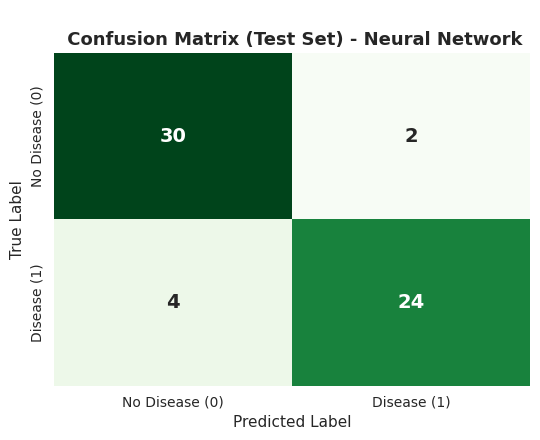

In [30]:
# Neural Network - Test Evaluation

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Predict on test set
y_test_pred_mlp = mlp_model.predict(X_test_scaled)

# Compute evaluation metrics
cm_test_mlp = confusion_matrix(y_test, y_test_pred_mlp)
TN, FP, FN, TP = cm_test_mlp.ravel()

test_accuracy_mlp = accuracy_score(y_test, y_test_pred_mlp)
test_precision_mlp = precision_score(y_test, y_test_pred_mlp)
test_recall_mlp = recall_score(y_test, y_test_pred_mlp)
test_specificity_mlp = TN / (TN + FP)
test_f1_mlp = f1_score(y_test, y_test_pred_mlp)

# Save in results dictionary
results['Neural Network'].update({
    'Test Accuracy': test_accuracy_mlp,
    'Test Precision': test_precision_mlp,
    'Test Recall': test_recall_mlp,
    'Test Specificity': test_specificity_mlp,
    'Test F1 Score': test_f1_mlp,
    'Test Confusion Matrix': cm_test_mlp
})

# Styled metrics table
test_metrics_df_mlp = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [test_accuracy_mlp, test_precision_mlp, test_recall_mlp, test_specificity_mlp, test_f1_mlp]
})

print("Test Set Evaluation for Neural Network:\n")
display(
    test_metrics_df_mlp.style
        .format({'Value': '{:.2%}'})
        .set_caption("Test Performance - Neural Network , (in %)")
        .background_gradient(cmap='Greens', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#d1f3d1'), ('font-weight', 'bold')]}
        ])
)

# Confusion Matrix Heatmap
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_test_mlp, annot=True, fmt='d', cmap='Greens', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\n Confusion Matrix (Test Set) - Neural Network', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [31]:
# Permutation Feature Importance for Neural Network (Train + Test) – All Metrics

from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, recall_score, precision_score, accuracy_score, f1_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, HTML
import numpy as np

# Display float precision
pd.options.display.float_format = '{:.8f}'.format

# Custom specificity scorer
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        return tn / (tn + fp) if (tn + fp) > 0 else 0
    return np.nan

# Prepare DataFrames from scaled arrays
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Define metrics
scoring_metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'Specificity': make_scorer(specificity_score),
    'F1 Score': make_scorer(f1_score)
}

# Color configuration for bar charts
importance_color_map = {
    'train': '#66bb6a',
    'test': '#42a5f5'
}

std_color_map = {
    'train': '#c8e6c9',
    'test': '#bbdefb'
}

zero_color = '#ff1744'
negative_color = '#d50000'

# Highlight rule
def highlight_negative_or_zero(val):
    if np.isclose(val, 0.0, atol=1e-8):
        return f'color: {zero_color}'
    elif val < 0:
        return f'color: {negative_color}; font-weight: bold'
    return ''

# Initialize storage
perm_results_all = {}

# Loop through metrics
for metric_name, scorer in scoring_metrics.items():

    # Permutation importance – Train
    perm_train = permutation_importance(
        estimator=mlp_model,
        X=X_train_df,
        y=y_train,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # Permutation importance – Test
    perm_test = permutation_importance(
        estimator=mlp_model,
        X=X_test_df,
        y=y_test,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # Train DataFrame
    df_train = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': perm_train.importances_mean,
        'Std': perm_train.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # Test DataFrame
    df_test = pd.DataFrame({
        'Feature': X_test.columns,
        'Importance': perm_test.importances_mean,
        'Std': perm_test.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # Save results
    perm_results_all[metric_name] = {'train': df_train, 'test': df_test}

    # Title
    display(Markdown(f"## Neural Network – Permutation Feature Importances ({metric_name})"))

    # Train Table
    train_html = (
        df_train.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['train'], vmin=0)
            .bar(subset='Std', color=std_color_map['train'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"Neural Network (Train) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Test Table
    test_html = (
        df_test.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['test'], vmin=0)
            .bar(subset='Std', color=std_color_map['test'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"Neural Network (Test) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Side-by-side layout
    html_output = f"""
    <div style="display: flex; gap: 50px;">
        <div>{train_html}</div>
        <div>{test_html}</div>
    </div>
    """
    display(HTML(html_output))

# Save it to master dictionary
all_models_perm_results['Neural Network'] = perm_results_all

## Neural Network – Permutation Feature Importances (Accuracy)

## Neural Network – Permutation Feature Importances (Precision)

## Neural Network – Permutation Feature Importances (Recall)

## Neural Network – Permutation Feature Importances (Specificity)

## Neural Network – Permutation Feature Importances (F1 Score)

Best Parameters for Decision Tree:
   → max_depth         : 3
   → min_samples_split : 2
   → min_samples_leaf  : 5
   → criterion         : entropy

 Training Set Evaluation for Decision Tree: 



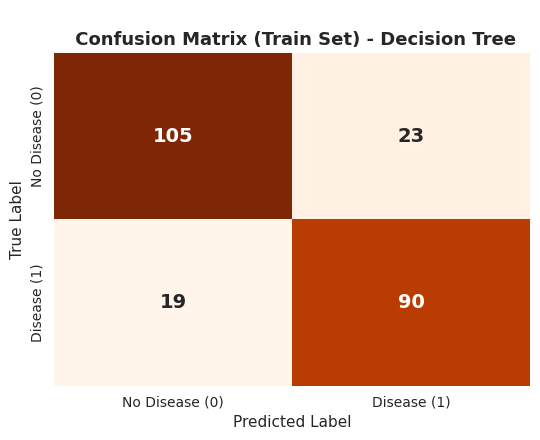

In [32]:
# Decision Tree - Train Evaluation

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Expanded and regularized parameter grid to reduce overfitting
param_grid = {
    'max_depth': [1, 2, 3, 4],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 5, 10, 15],
    'criterion': ['gini', 'entropy']
}

# Grid Search with 10-fold CV and F1 as scoring
grid_tree = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1',
    cv=10,
    n_jobs=-1
)

grid_tree.fit(X_train_scaled, y_train)
best_tree = grid_tree.best_estimator_

# Predict on training set
y_train_pred_tree = best_tree.predict(X_train_scaled)

# Display best hyperparameters
params = grid_tree.best_params_
print("Best Parameters for Decision Tree:")
print(f"   → max_depth         : {params['max_depth']}")
print(f"   → min_samples_split : {params['min_samples_split']}")
print(f"   → min_samples_leaf  : {params['min_samples_leaf']}")
print(f"   → criterion         : {params['criterion']}")

# Training performance metrics
cm_train_tree = confusion_matrix(y_train, y_train_pred_tree)
TN, FP, FN, TP = cm_train_tree.ravel()

train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)
train_precision_tree = precision_score(y_train, y_train_pred_tree)
train_recall_tree = recall_score(y_train, y_train_pred_tree)
train_specificity_tree = TN / (TN + FP)
train_f1_tree = f1_score(y_train, y_train_pred_tree)

# Store results
results['Decision Tree'] = {
    'Train Accuracy': train_accuracy_tree,
    'Train Precision': train_precision_tree,
    'Train Recall': train_recall_tree,
    'Train Specificity': train_specificity_tree,
    'Train F1 Score': train_f1_tree,
    'Train Confusion Matrix': cm_train_tree,
    'Best Parameters': params
}

# Display styled metrics table
train_metrics_df_tree = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [train_accuracy_tree, train_precision_tree, train_recall_tree, train_specificity_tree, train_f1_tree]
})

print("\n Training Set Evaluation for Decision Tree: \n")
display(
    train_metrics_df_tree.style
        .format({'Value': '{:.2%}'})
        .set_caption("Training Performance - Decision Tree , (in %)")
        .background_gradient(cmap='Oranges', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#ffdcba'), ('font-weight', 'bold')]}
        ])
)

# Confusion Matrix Heatmap
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_train_tree, annot=True, fmt='d', cmap='Oranges', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\n Confusion Matrix (Train Set) - Decision Tree', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Test Set Evaluation for Decision Tree:



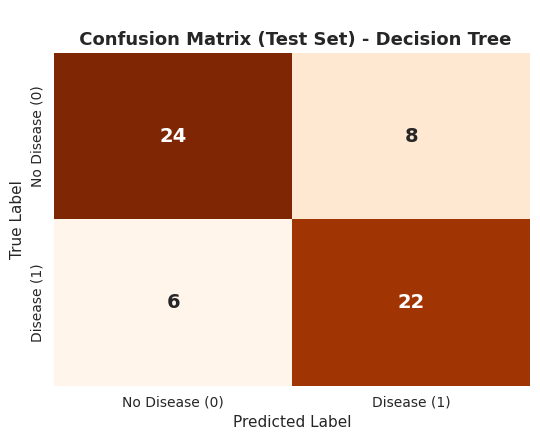

In [33]:
# Decision Tree - Test Evaluation

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Predict on test set using best_tree (not tree_model)
y_test_pred_tree = best_tree.predict(X_test_scaled)

# Compute confusion matrix and metrics
cm_test_tree = confusion_matrix(y_test, y_test_pred_tree)
TN, FP, FN, TP = cm_test_tree.ravel()

test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)
test_precision_tree = precision_score(y_test, y_test_pred_tree)
test_recall_tree = recall_score(y_test, y_test_pred_tree)
test_specificity_tree = TN / (TN + FP)
test_f1_tree = f1_score(y_test, y_test_pred_tree)

# Update results dictionary
results['Decision Tree'].update({
    'Test Accuracy': test_accuracy_tree,
    'Test Precision': test_precision_tree,
    'Test Recall': test_recall_tree,
    'Test Specificity': test_specificity_tree,
    'Test F1 Score': test_f1_tree,
    'Test Confusion Matrix': cm_test_tree
})

# Styled test metrics table
test_metrics_df_tree = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [test_accuracy_tree, test_precision_tree, test_recall_tree, test_specificity_tree, test_f1_tree]
})

print("Test Set Evaluation for Decision Tree:\n")
display(
    test_metrics_df_tree.style
        .format({'Value': '{:.2%}'})
        .set_caption("Test Performance - Decision Tree , (in %)")
        .background_gradient(cmap='Oranges', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#ffdcba'), ('font-weight', 'bold')]}
        ])
)

# Confusion Matrix Heatmap
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_test_tree, annot=True, fmt='d', cmap='Oranges', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\n Confusion Matrix (Test Set) - Decision Tree', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [34]:
# Permutation Feature Importance for Decision Tree (Train + Test) – All Metrics

from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, recall_score, precision_score, accuracy_score, f1_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, HTML
import numpy as np

# Float display config
pd.options.display.float_format = '{:.8f}'.format

# Define specificity
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        return tn / (tn + fp) if (tn + fp) > 0 else 0
    return np.nan

# Build DataFrames from scaled arrays
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Scoring metrics
scoring_metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'Specificity': make_scorer(specificity_score),
    'F1 Score': make_scorer(f1_score)
}

# Color configuration for bar charts
importance_color_map = {
    'train': '#66bb6a',
    'test': '#42a5f5'
}

std_color_map = {
    'train': '#c8e6c9',
    'test': '#bbdefb'
}

zero_color = '#ff1744'
negative_color = '#d50000'

# Highlight zero/negative
def highlight_negative_or_zero(val):
    if np.isclose(val, 0.0, atol=1e-8):
        return f'color: {zero_color}'
    elif val < 0:
        return f'color: {negative_color}; font-weight: bold'
    return ''

# Dictionary structure
perm_results_all = {}

# Loop for all metrics
for metric_name, scorer in scoring_metrics.items():

    # Permutation – train
    perm_train = permutation_importance(
        estimator=best_tree,
        X=X_train_df,
        y=y_train,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # Permutation – test
    perm_test = permutation_importance(
        estimator=best_tree,
        X=X_test_df,
        y=y_test,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # DataFrame – train
    df_train = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': perm_train.importances_mean,
        'Std': perm_train.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # DataFrame – test
    df_test = pd.DataFrame({
        'Feature': X_test.columns,
        'Importance': perm_test.importances_mean,
        'Std': perm_test.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # Store in dictionary
    perm_results_all[metric_name] = {'train': df_train, 'test': df_test}

    # Markdown heading
    display(Markdown(f"## Decision Tree – Permutation Feature Importances ({metric_name})"))

    # HTML train table
    train_html = (
        df_train.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['train'], vmin=0)
            .bar(subset='Std', color=std_color_map['train'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"Decision Tree (Train) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # HTML test table
    test_html = (
        df_test.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['test'], vmin=0)
            .bar(subset='Std', color=std_color_map['test'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"Decision Tree (Test) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Side-by-side display
    html_output = f"""
    <div style="display: flex; gap: 50px;">
        <div>{train_html}</div>
        <div>{test_html}</div>
    </div>
    """
    display(HTML(html_output))

# Save it to master dictionary
all_models_perm_results['Decision Tree'] = perm_results_all

## Decision Tree – Permutation Feature Importances (Accuracy)

## Decision Tree – Permutation Feature Importances (Precision)

## Decision Tree – Permutation Feature Importances (Recall)

## Decision Tree – Permutation Feature Importances (Specificity)

## Decision Tree – Permutation Feature Importances (F1 Score)

Fitting 10 folds for each of 28 candidates, totalling 280 fits
Best Parameters for KNN:
   → n_neighbors : 9
   → weights     : uniform
   → metric      : euclidean

 Training Set Evaluation for KNN: 



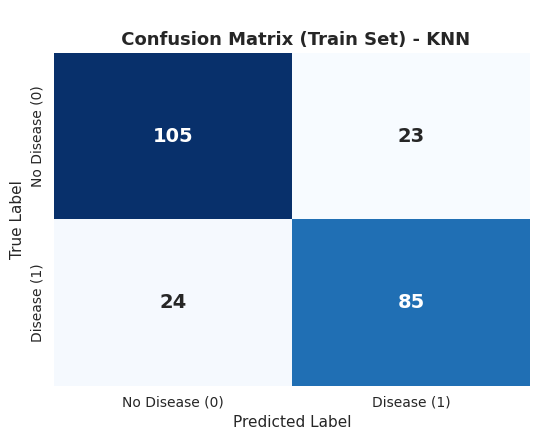

In [35]:
# K-Nearest Neighbors (KNN) - Train Evaluation

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, make_scorer
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Custom specificity scorer
def specificity_score(y_true, y_pred):
    tn = ((y_true == 0) & (y_pred == 0)).sum()
    fp = ((y_true == 0) & (y_pred == 1)).sum()
    return tn / (tn + fp) if (tn + fp) > 0 else 0

# Hybrid scoring: weighted average of recall and f1 (60% recall, 40% f1)
def hybrid_score(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return 0.6 * recall + 0.4 * f1

# Custom scorer
hybrid_scorer = make_scorer(hybrid_score, greater_is_better=True)

# Cross-validation setup
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Hyperparameter grid
param_grid = {
    'n_neighbors': list(range(3, 16, 2)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Grid search
grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    scoring=hybrid_scorer,
    cv=cv,
    n_jobs=-1,
    verbose=1
)
grid_search_knn.fit(X_train_scaled, y_train)
best_knn = grid_search_knn.best_estimator_

# Print best parameters clearly
params = grid_search_knn.best_params_
print("Best Parameters for KNN:")
print(f"   → n_neighbors : {params['n_neighbors']}")
print(f"   → weights     : {params['weights']}")
print(f"   → metric      : {params['metric']}")

# Predict with cross-validation
y_train_pred_knn = cross_val_predict(best_knn, X_train_scaled, y_train, cv=cv)

# Confusion matrix
cm_train_knn = confusion_matrix(y_train, y_train_pred_knn)
TN, FP, FN, TP = cm_train_knn.ravel()

# Metrics
train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
train_precision_knn = precision_score(y_train, y_train_pred_knn)
train_recall_knn = recall_score(y_train, y_train_pred_knn)
train_specificity_knn = specificity_score(y_train, y_train_pred_knn)
train_f1_knn = f1_score(y_train, y_train_pred_knn)

# Save results
results['KNN'] = {
    'Train Accuracy': train_accuracy_knn,
    'Train Precision': train_precision_knn,
    'Train Recall': train_recall_knn,
    'Train Specificity': train_specificity_knn,
    'Train F1 Score': train_f1_knn,
    'Train Confusion Matrix': cm_train_knn,
    'Best Parameters': grid_search_knn.best_params_
}

# Metrics table
train_metrics_df_knn = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [train_accuracy_knn, train_precision_knn, train_recall_knn, train_specificity_knn, train_f1_knn]
})

print("\n Training Set Evaluation for KNN: \n")
display(
    train_metrics_df_knn.style
        .format({'Value': '{:.2%}'})
        .set_caption("Training Performance - KNN , (in %)")
        .background_gradient(cmap='Blues', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([{'selector': 'th', 'props': [('background-color', '#cde6f9'), ('font-weight', 'bold')]}])
)

# Confusion Matrix
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_train_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\n Confusion Matrix (Train Set) - KNN', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Test Set Evaluation for KNN :



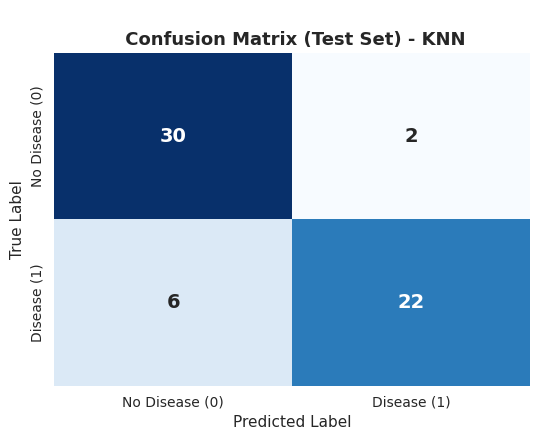

In [36]:
# K-Nearest Neighbors (KNN) - Test Evaluation

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Predict on test set
y_test_pred_knn = best_knn.predict(X_test_scaled)

# Confusion matrix
cm_test_knn = confusion_matrix(y_test, y_test_pred_knn)
if cm_test_knn.shape == (2, 2):
    TN, FP, FN, TP = cm_test_knn.ravel()
else:
    raise ValueError("Confusion matrix shape is not 2x2.")

# Compute metrics
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
test_precision_knn = precision_score(y_test, y_test_pred_knn)
test_recall_knn = recall_score(y_test, y_test_pred_knn)
test_specificity_knn = TN / (TN + FP)
test_f1_knn = f1_score(y_test, y_test_pred_knn)

# Save results
results['KNN'].update({
    'Test Accuracy': test_accuracy_knn,
    'Test Precision': test_precision_knn,
    'Test Recall': test_recall_knn,
    'Test Specificity': test_specificity_knn,
    'Test F1 Score': test_f1_knn,
    'Test Confusion Matrix': cm_test_knn
})

# Styled metrics table
test_metrics_df_knn = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [test_accuracy_knn, test_precision_knn, test_recall_knn, test_specificity_knn, test_f1_knn]
})

print("Test Set Evaluation for KNN :\n")
display(
    test_metrics_df_knn.style
        .format({'Value': '{:.2%}'})
        .set_caption("Test Performance - KNN , (in %)")
        .background_gradient(cmap='Blues', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#cde6f9'), ('font-weight', 'bold')]}
        ])
)

# Confusion Matrix
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_test_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\n Confusion Matrix (Test Set) - KNN', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [37]:
# Permutation Feature Importance for KNN (Train + Test) – All Metrics

from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, recall_score, precision_score, accuracy_score, f1_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, HTML
import numpy as np

# Float precision
pd.options.display.float_format = '{:.8f}'.format

# Custom specificity
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        return tn / (tn + fp) if (tn + fp) > 0 else 0
    return np.nan

# Convert scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Define evaluation metrics
scoring_metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'Specificity': make_scorer(specificity_score),
    'F1 Score': make_scorer(f1_score)
}

# Color configuration for bar charts
importance_color_map = {
    'train': '#66bb6a',
    'test': '#42a5f5'
}

std_color_map = {
    'train': '#c8e6c9',
    'test': '#bbdefb'
}

zero_color = '#ff1744'
negative_color = '#d50000'

# Highlight formatting
def highlight_negative_or_zero(val):
    if np.isclose(val, 0.0, atol=1e-8):
        return f'color: {zero_color}'
    elif val < 0:
        return f'color: {negative_color}; font-weight: bold'
    return ''

# Storage dictionaries
perm_results_all = {}

# Loop over metrics
for metric_name, scorer in scoring_metrics.items():

    # Permutation – Train
    perm_train = permutation_importance(
        estimator=best_knn,
        X=X_train_df,
        y=y_train,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # Permutation – Test
    perm_test = permutation_importance(
        estimator=best_knn,
        X=X_test_df,
        y=y_test,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # DataFrames
    df_train = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': perm_train.importances_mean,
        'Std': perm_train.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    df_test = pd.DataFrame({
        'Feature': X_test.columns,
        'Importance': perm_test.importances_mean,
        'Std': perm_test.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # Save results
    perm_results_all[metric_name] = {'train': df_train, 'test': df_test}

    # Section title
    display(Markdown(f"## KNN – Permutation Feature Importances ({metric_name})"))

    # Train table
    train_html = (
        df_train.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['train'], vmin=0)
            .bar(subset='Std', color=std_color_map['train'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"KNN (Train) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Test table
    test_html = (
        df_test.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['test'], vmin=0)
            .bar(subset='Std', color=std_color_map['test'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"KNN (Test) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Show both tables
    html_output = f"""
    <div style="display: flex; gap: 50px;">
        <div>{train_html}</div>
        <div>{test_html}</div>
    </div>
    """
    display(HTML(html_output))

# Save it to master dictionary
all_models_perm_results['KNN'] = perm_results_all

## KNN – Permutation Feature Importances (Accuracy)

## KNN – Permutation Feature Importances (Precision)

## KNN – Permutation Feature Importances (Recall)

## KNN – Permutation Feature Importances (Specificity)

## KNN – Permutation Feature Importances (F1 Score)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits

Best Parameters for Random Forest:
   → class_weight: balanced
   → criterion: entropy
   → max_depth: 3
   → min_samples_leaf: 1
   → min_samples_split: 5
   → n_estimators: 300

 Training Set Evaluation for Random Forest: 



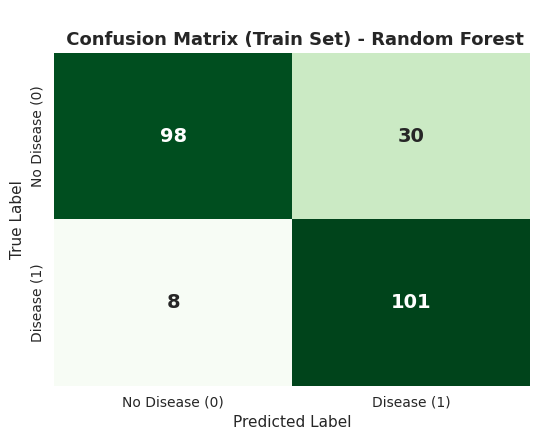

In [38]:
# Random Forest - Train Evaluation

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, make_scorer, roc_curve
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np

# Custom specificity scorer
def specificity_score(y_true, y_pred):
    tn = ((y_true == 0) & (y_pred == 0)).sum()
    fp = ((y_true == 0) & (y_pred == 1)).sum()
    return tn / (tn + fp) if (tn + fp) > 0 else 0

# Hybrid scoring: 80% recall + 20% f1
def hybrid_score(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return 0.8 * recall + 0.2 * f1

hybrid_scorer = make_scorer(hybrid_score, greater_is_better=True)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Expanded param grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced']
}

# RandomForest with oob_score
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, oob_score=True),
    param_grid=param_grid,
    scoring=hybrid_scorer,
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train_scaled, y_train)
best_rf = grid_search_rf.best_estimator_

# Calibrate for better probability output
calibrated_rf = CalibratedClassifierCV(best_rf, method='sigmoid', cv=5)
calibrated_rf.fit(X_train_scaled, y_train)

# Get probabilities for thresholding
y_train_probs = calibrated_rf.predict_proba(X_train_scaled)[:, 1]

# Use fixed threshold = 0.30
fixed_threshold = 0.30
y_train_pred_rf = (y_train_probs >= fixed_threshold).astype(int)

# Confusion Matrix
cm_train_rf = confusion_matrix(y_train, y_train_pred_rf)
TN, FP, FN, TP = cm_train_rf.ravel()

# Metrics
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
train_precision_rf = precision_score(y_train, y_train_pred_rf)
train_recall_rf = recall_score(y_train, y_train_pred_rf)
train_specificity_rf = specificity_score(y_train, y_train_pred_rf)
train_f1_rf = f1_score(y_train, y_train_pred_rf)

# Save results
results['Random Forest'] = {
    'Train Accuracy': train_accuracy_rf,
    'Train Precision': train_precision_rf,
    'Train Recall': train_recall_rf,
    'Train Specificity': train_specificity_rf,
    'Train F1 Score': train_f1_rf,
    'Train Confusion Matrix': cm_train_rf,
    'Best Parameters': grid_search_rf.best_params_,
    'Best Threshold': fixed_threshold
}

# Show best parameters in readable format
print("\nBest Parameters for Random Forest:")
for key, value in grid_search_rf.best_params_.items():
    print(f"   → {key}: {value}")

# Styled table
train_metrics_df_rf = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [train_accuracy_rf, train_precision_rf, train_recall_rf, train_specificity_rf, train_f1_rf]
})

print("\n Training Set Evaluation for Random Forest: \n")
display(
    train_metrics_df_rf.style
        .format({'Value': '{:.2%}'})
        .set_caption("Training Performance - Random Forest , (in %)")
        .background_gradient(cmap='Greens', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#cdebcf'), ('font-weight', 'bold')]}
        ])
)

# Confusion Matrix Heatmap
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_train_rf, annot=True, fmt='d', cmap='Greens', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\n Confusion Matrix (Train Set) - Random Forest', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Test Set Evaluation for Random Forest:



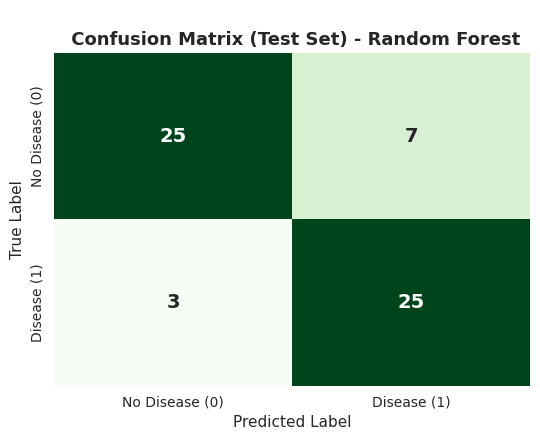

In [39]:
# Random Forest - Test Evaluation

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np

# Predict probabilities on test set using calibrated model
y_test_probs = calibrated_rf.predict_proba(X_test_scaled)[:, 1]

# Apply fixed threshold = 0.30
y_test_pred_rf = (y_test_probs >= 0.30).astype(int)

# Confusion matrix
cm_test_rf = confusion_matrix(y_test, y_test_pred_rf)
if cm_test_rf.shape == (2, 2):
    TN, FP, FN, TP = cm_test_rf.ravel()
else:
    raise ValueError("Confusion matrix shape is not 2x2.")

# Compute test metrics
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_precision_rf = precision_score(y_test, y_test_pred_rf)
test_recall_rf = recall_score(y_test, y_test_pred_rf)
test_specificity_rf = TN / (TN + FP) if (TN + FP) > 0 else 0
test_f1_rf = f1_score(y_test, y_test_pred_rf)

# Update results
results['Random Forest'].update({
    'Test Accuracy': test_accuracy_rf,
    'Test Precision': test_precision_rf,
    'Test Recall': test_recall_rf,
    'Test Specificity': test_specificity_rf,
    'Test F1 Score': test_f1_rf,
    'Test Confusion Matrix': cm_test_rf
})

# Styled metrics table
test_metrics_df_rf = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [test_accuracy_rf, test_precision_rf, test_recall_rf, test_specificity_rf, test_f1_rf]
})

print("Test Set Evaluation for Random Forest:\n")
display(
    test_metrics_df_rf.style
        .format({'Value': '{:.2%}'})
        .set_caption("Test Performance - Random Forest , (in %)")
        .background_gradient(cmap='Greens', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#cdebcf'), ('font-weight', 'bold')]}
        ])
)

# Confusion Matrix Heatmap
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_test_rf, annot=True, fmt='d', cmap='Greens', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\n Confusion Matrix (Test Set) - Random Forest', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [40]:
# Permutation Feature Importance for Random Forest (Train + Test) – All Metrics

from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, recall_score, precision_score, accuracy_score, f1_score, confusion_matrix
from IPython.display import display, Markdown, HTML
import pandas as pd
import numpy as np

# Float precision
pd.options.display.float_format = '{:.8f}'.format

# Custom specificity
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        return tn / (tn + fp) if (tn + fp) > 0 else 0
    return np.nan

# Convert scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Define evaluation metrics
scoring_metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'Specificity': make_scorer(specificity_score),
    'F1 Score': make_scorer(f1_score)
}

# Color configuration for bar charts
importance_color_map = {
    'train': '#66bb6a',
    'test': '#42a5f5'
}

std_color_map = {
    'train': '#c8e6c9',
    'test': '#bbdefb'
}

zero_color = '#ff1744'
negative_color = '#d50000'

# Highlight formatting
def highlight_negative_or_zero(val):
    if np.isclose(val, 0.0, atol=1e-8):
        return f'color: {zero_color}'
    elif val < 0:
        return f'color: {negative_color}; font-weight: bold'
    return ''

# Storage dictionaries
perm_results_all = {}

# Loop over metrics
for metric_name, scorer in scoring_metrics.items():

    # Permutation – Train
    perm_train = permutation_importance(
        estimator=best_rf,
        X=X_train_df,
        y=y_train,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # Permutation – Test
    perm_test = permutation_importance(
        estimator=best_rf,
        X=X_test_df,
        y=y_test,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # DataFrames
    df_train = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': perm_train.importances_mean,
        'Std': perm_train.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    df_test = pd.DataFrame({
        'Feature': X_test.columns,
        'Importance': perm_test.importances_mean,
        'Std': perm_test.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # Save results
    perm_results_all[metric_name] = {'train': df_train, 'test': df_test}

    # Section title
    display(Markdown(f"## Random Forest – Permutation Feature Importances ({metric_name})"))

    # Train table
    train_html = (
        df_train.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['train'], vmin=0)
            .bar(subset='Std', color=std_color_map['train'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"Random Forest (Train) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Test table
    test_html = (
        df_test.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['test'], vmin=0)
            .bar(subset='Std', color=std_color_map['test'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"Random Forest (Test) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Show both tables
    html_output = f"""
    <div style="display: flex; gap: 50px;">
        <div>{train_html}</div>
        <div>{test_html}</div>
    </div>
    """
    display(HTML(html_output))

# Save it to master dictionary
all_models_perm_results['Random Forest'] = perm_results_all

## Random Forest – Permutation Feature Importances (Accuracy)

## Random Forest – Permutation Feature Importances (Precision)

## Random Forest – Permutation Feature Importances (Recall)

## Random Forest – Permutation Feature Importances (Specificity)

## Random Forest – Permutation Feature Importances (F1 Score)

Fitting 10 folds for each of 1536 candidates, totalling 15360 fits
Best Parameters for XGBoost:
   → colsample_bytree: 0.8
   → gamma: 0.1
   → learning_rate: 0.005
   → max_depth: 3
   → min_child_weight: 3
   → n_estimators: 300
   → reg_alpha: 0.5
   → reg_lambda: 3
   → scale_pos_weight: 6
   → subsample: 0.8

Optimal Threshold (based on F1): 0.456

Training Set Evaluation for XGBoost:



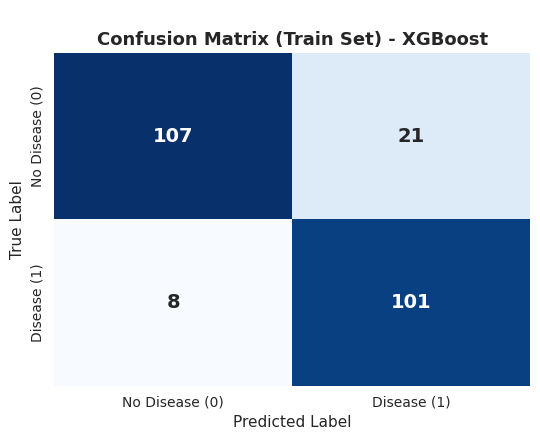

In [41]:
# XGBoost - Train Evaluation

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, make_scorer
)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Custom Scorers
def specificity_score(y_true, y_pred):
    tn = ((y_true == 0) & (y_pred == 0)).sum()
    fp = ((y_true == 0) & (y_pred == 1)).sum()
    return tn / (tn + fp) if (tn + fp) > 0 else 0

def hybrid_score(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return 0.7 * recall + 0.3 * precision

hybrid_scorer = make_scorer(hybrid_score, greater_is_better=True)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# --- Param Grid ---
param_grid = {
    'n_estimators': [300, 400],
    'max_depth': [3, 4],  # shallower trees
    'learning_rate': [0.005, 0.01],  # slower learning
    'subsample': [0.8, 0.9],  # less aggressive sampling
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [5, 6],  # still tuned for imbalance
    'gamma': [0.1, 0.3, 0.5],  # more conservative splitting
    'min_child_weight': [3, 5],  # prevent over-splitting
    'reg_alpha': [0, 0.5],  # L1 regularization
    'reg_lambda': [1, 3]    # L2 regularization
}

# Grid Search
grid_search_xgb = GridSearchCV(
    estimator=XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    ),
    param_grid=param_grid,
    scoring=hybrid_scorer,
    cv=cv,
    n_jobs=-1,
    verbose=1
)
grid_search_xgb.fit(X_train_scaled, y_train)
best_xgb = grid_search_xgb.best_estimator_

print("Best Parameters for XGBoost:")
for key, value in grid_search_xgb.best_params_.items():
    print(f"   → {key}: {value}")

# Calibration
calibrated_xgb = CalibratedClassifierCV(best_xgb, method='sigmoid', cv=5)
calibrated_xgb.fit(X_train_scaled, y_train)

# Predict Probabilities & Optimize Threshold (F1-Based)
y_train_proba_xgb = calibrated_xgb.predict_proba(X_train_scaled)[:, 1]
thresholds = np.linspace(0.1, 0.9, 100)
f1_scores = [f1_score(y_train, (y_train_proba_xgb >= t).astype(int)) for t in thresholds]
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"\nOptimal Threshold (based on F1): {best_threshold:.3f}")

# Final Predictions
y_train_pred_xgb = (y_train_proba_xgb >= best_threshold).astype(int)
cm_train_xgb = confusion_matrix(y_train, y_train_pred_xgb)
TN, FP, FN, TP = cm_train_xgb.ravel()

# Metrics
train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
train_precision_xgb = precision_score(y_train, y_train_pred_xgb)
train_recall_xgb = recall_score(y_train, y_train_pred_xgb)
train_specificity_xgb = specificity_score(y_train, y_train_pred_xgb)
train_f1_xgb = f1_score(y_train, y_train_pred_xgb)

# Save to results
results['XGBoost'] = {
    'Train Accuracy': train_accuracy_xgb,
    'Train Precision': train_precision_xgb,
    'Train Recall': train_recall_xgb,
    'Train Specificity': train_specificity_xgb,
    'Train F1 Score': train_f1_xgb,
    'Train Confusion Matrix': cm_train_xgb,
    'Threshold Used': best_threshold,
    'Best Parameters': grid_search_xgb.best_params_
}

# Display Styled Table
train_metrics_df_xgb = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [train_accuracy_xgb, train_precision_xgb, train_recall_xgb, train_specificity_xgb, train_f1_xgb]
})

print("\nTraining Set Evaluation for XGBoost:\n")
display(
    train_metrics_df_xgb.style
        .format({'Value': '{:.2%}'})
        .set_caption("Training Performance - XGBoost , (in %)")
        .background_gradient(cmap='Blues', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#cde6f9'), ('font-weight', 'bold')]}
        ])
)

# Confusion Matrix Plot
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_train_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\nConfusion Matrix (Train Set) - XGBoost',
          fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Test Set Evaluation for XGBoost:



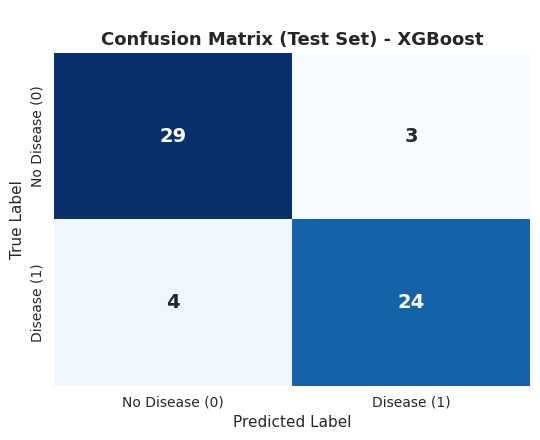

In [42]:
# XGBoost - Test Evaluation

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Predict probabilities using calibrated model
y_test_proba_xgb = calibrated_xgb.predict_proba(X_test_scaled)[:, 1]

# Use threshold from training
threshold = results['XGBoost']['Threshold Used']
y_test_pred_xgb = (y_test_proba_xgb >= threshold).astype(int)

# Confusion matrix
cm_test_xgb = confusion_matrix(y_test, y_test_pred_xgb)
TN, FP, FN, TP = cm_test_xgb.ravel()

# Compute metrics
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
test_precision_xgb = precision_score(y_test, y_test_pred_xgb)
test_recall_xgb = recall_score(y_test, y_test_pred_xgb)
test_specificity_xgb = TN / (TN + FP) if (TN + FP) > 0 else 0
test_f1_xgb = f1_score(y_test, y_test_pred_xgb)

# Update results
results['XGBoost'].update({
    'Test Accuracy': test_accuracy_xgb,
    'Test Precision': test_precision_xgb,
    'Test Recall': test_recall_xgb,
    'Test Specificity': test_specificity_xgb,
    'Test F1 Score': test_f1_xgb,
    'Test Confusion Matrix': cm_test_xgb
})

# Styled results table
test_metrics_df_xgb = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [test_accuracy_xgb, test_precision_xgb, test_recall_xgb, test_specificity_xgb, test_f1_xgb]
})

print("Test Set Evaluation for XGBoost:\n")
display(
    test_metrics_df_xgb.style
        .format({'Value': '{:.2%}'})
        .set_caption("Test Performance - XGBoost , (in %)")
        .background_gradient(cmap='Blues', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#cde6f9'), ('font-weight', 'bold')]}
        ])
)

# Confusion Matrix Plot
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_test_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\nConfusion Matrix (Test Set) - XGBoost',
          fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [43]:
# Permutation Feature Importance for XGBoost (Train + Test) – All Metrics

from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, recall_score, precision_score, accuracy_score, f1_score, confusion_matrix
from IPython.display import display, Markdown, HTML
import pandas as pd
import numpy as np

# Float precision
pd.options.display.float_format = '{:.8f}'.format

# Custom specificity
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        return tn / (tn + fp) if (tn + fp) > 0 else 0
    return np.nan

# Convert scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Define evaluation metrics
scoring_metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'Specificity': make_scorer(specificity_score),
    'F1 Score': make_scorer(f1_score)
}

# Color configuration for bar charts
importance_color_map = {
    'train': '#66bb6a',
    'test': '#42a5f5'
}

std_color_map = {
    'train': '#c8e6c9',
    'test': '#bbdefb'
}

zero_color = '#ff1744'
negative_color = '#d50000'

# Highlight formatting
def highlight_negative_or_zero(val):
    if np.isclose(val, 0.0, atol=1e-8):
        return f'color: {zero_color}'
    elif val < 0:
        return f'color: {negative_color}; font-weight: bold'
    return ''

# Storage dictionaries
perm_results_all = {}

# Loop over metrics
for metric_name, scorer in scoring_metrics.items():

    # Permutation – Train
    perm_train = permutation_importance(
        estimator=calibrated_xgb,
        X=X_train_df,
        y=y_train,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # Permutation – Test
    perm_test = permutation_importance(
        estimator=calibrated_xgb,
        X=X_test_df,
        y=y_test,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # DataFrames
    df_train = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': perm_train.importances_mean,
        'Std': perm_train.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    df_test = pd.DataFrame({
        'Feature': X_test.columns,
        'Importance': perm_test.importances_mean,
        'Std': perm_test.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # Save results
    perm_results_all[metric_name] = {'train': df_train, 'test': df_test}

    # Section title
    display(Markdown(f"## XGBoost – Permutation Feature Importances ({metric_name})"))

    # Train table
    train_html = (
        df_train.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['train'], vmin=0)
            .bar(subset='Std', color=std_color_map['train'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"XGBoost (Train) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Test table
    test_html = (
        df_test.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['test'], vmin=0)
            .bar(subset='Std', color=std_color_map['test'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"XGBoost (Test) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Show both tables
    html_output = f"""
    <div style="display: flex; gap: 50px;">
        <div>{train_html}</div>
        <div>{test_html}</div>
    </div>
    """
    display(HTML(html_output))

# Save it to master dictionary
all_models_perm_results['XGBoost'] = perm_results_all

## XGBoost – Permutation Feature Importances (Accuracy)

## XGBoost – Permutation Feature Importances (Precision)

## XGBoost – Permutation Feature Importances (Recall)

## XGBoost – Permutation Feature Importances (Specificity)

## XGBoost – Permutation Feature Importances (F1 Score)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best Parameters for AdaBoost:
   → learning_rate: 0.05
   → n_estimators: 100

Final Threshold Used: 0.320

Training Set Evaluation for AdaBoost:



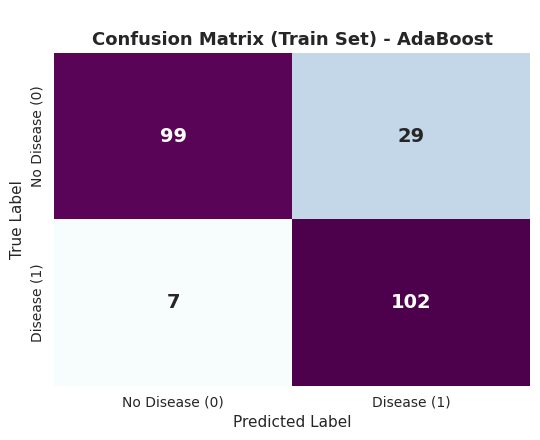

In [44]:
# AdaBoost - Train Evaluation

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, make_scorer
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np

# Custom Scorers
def specificity_score(y_true, y_pred):
    tn = ((y_true == 0) & (y_pred == 0)).sum()
    fp = ((y_true == 0) & (y_pred == 1)).sum()
    return tn / (tn + fp) if (tn + fp) > 0 else 0

def hybrid_score(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return 0.7 * recall + 0.3 * precision

hybrid_scorer = make_scorer(hybrid_score, greater_is_better=True)

# Cross-validation setup
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Base Estimator
base_tree = DecisionTreeClassifier(max_depth=2)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
}

# GridSearchCV with AdaBoost
grid_search_ada = GridSearchCV(
    estimator=AdaBoostClassifier(estimator=base_tree, random_state=42),
    param_grid=param_grid,
    scoring=hybrid_scorer,
    cv=cv,
    n_jobs=-1,
    verbose=1
)
grid_search_ada.fit(X_train_scaled, y_train)
best_ada = grid_search_ada.best_estimator_

print("Best Parameters for AdaBoost:")
for key, val in grid_search_ada.best_params_.items():
    print(f"   → {key}: {val}")

# Calibrate the model
calibrated_ada = CalibratedClassifierCV(best_ada, method='sigmoid', cv=5)
calibrated_ada.fit(X_train_scaled, y_train)

# Get probabilities and apply best threshold = 0.32
y_train_proba_ada = calibrated_ada.predict_proba(X_train_scaled)[:, 1]
best_threshold = 0.32  # ← Fixed from threshold analysis

print(f"\nFinal Threshold Used: {best_threshold:.3f}")

# Final predictions
y_train_pred_ada = (y_train_proba_ada >= best_threshold).astype(int)
cm_train_ada = confusion_matrix(y_train, y_train_pred_ada)
TN, FP, FN, TP = cm_train_ada.ravel()

# Metrics
train_accuracy_ada = accuracy_score(y_train, y_train_pred_ada)
train_precision_ada = precision_score(y_train, y_train_pred_ada)
train_recall_ada = recall_score(y_train, y_train_pred_ada)
train_specificity_ada = specificity_score(y_train, y_train_pred_ada)
train_f1_ada = f1_score(y_train, y_train_pred_ada)

# Save to results
results['AdaBoost'] = {
    'Train Accuracy': train_accuracy_ada,
    'Train Precision': train_precision_ada,
    'Train Recall': train_recall_ada,
    'Train Specificity': train_specificity_ada,
    'Train F1 Score': train_f1_ada,
    'Train Confusion Matrix': cm_train_ada,
    'Threshold Used': best_threshold,
    'Best Parameters': grid_search_ada.best_params_
}

# Display final metrics table
train_metrics_df_ada = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [train_accuracy_ada, train_precision_ada, train_recall_ada, train_specificity_ada, train_f1_ada]
})

print("\nTraining Set Evaluation for AdaBoost:\n")
display(
    train_metrics_df_ada.style
        .format({'Value': '{:.2%}'})
        .set_caption("Training Performance - AdaBoost , (in %)")
        .background_gradient(cmap='BuPu', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#e0d9f8'), ('font-weight', 'bold')]}
        ])
)

# Plot Confusion Matrix
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_train_ada, annot=True, fmt='d', cmap='BuPu', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\nConfusion Matrix (Train Set) - AdaBoost',
          fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# AdaBoost - Test Evaluation

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Get test set probabilities
y_test_proba_ada = calibrated_ada.predict_proba(X_test_scaled)[:, 1]

# Apply threshold = 0.32
threshold = 0.32  # based on sensitivity test
y_test_pred_ada = (y_test_proba_ada >= threshold).astype(int)

# Confusion matrix
cm_test_ada = confusion_matrix(y_test, y_test_pred_ada)
TN, FP, FN, TP = cm_test_ada.ravel()

# Compute test metrics
test_accuracy_ada = accuracy_score(y_test, y_test_pred_ada)
test_precision_ada = precision_score(y_test, y_test_pred_ada)
test_recall_ada = recall_score(y_test, y_test_pred_ada)
test_specificity_ada = TN / (TN + FP) if (TN + FP) > 0 else 0
test_f1_ada = f1_score(y_test, y_test_pred_ada)

# Update results dictionary
results['AdaBoost'].update({
    'Test Accuracy': test_accuracy_ada,
    'Test Precision': test_precision_ada,
    'Test Recall': test_recall_ada,
    'Test Specificity': test_specificity_ada,
    'Test F1 Score': test_f1_ada,
    'Test Confusion Matrix': cm_test_ada,
    'Threshold Used': threshold
})

# Styled metrics table
test_metrics_df_ada = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [test_accuracy_ada, test_precision_ada, test_recall_ada, test_specificity_ada, test_f1_ada]
})

print("Test Set Evaluation for AdaBoost:\n")
display(
    test_metrics_df_ada.style
        .format({'Value': '{:.2%}'})
        .set_caption("Test Performance - AdaBoost , (in %)")
        .background_gradient(cmap='BuPu', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#e0d9f8'), ('font-weight', 'bold')]}
        ])
)

# Confusion Matrix Heatmap
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_test_ada, annot=True, fmt='d', cmap='BuPu', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\nConfusion Matrix (Test Set) - AdaBoost',
          fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [46]:
# Permutation Feature Importance for AdaBoost (Train + Test) – All Metrics

from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, recall_score, precision_score, accuracy_score, f1_score, confusion_matrix
from IPython.display import display, Markdown, HTML
import pandas as pd
import numpy as np

# Float precision
pd.options.display.float_format = '{:.8f}'.format

# Custom specificity
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        return tn / (tn + fp) if (tn + fp) > 0 else 0
    return np.nan

# Convert scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Define evaluation metrics
scoring_metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score, zero_division=0),
    'Recall': make_scorer(recall_score, zero_division=0),
    'Specificity': make_scorer(specificity_score),
    'F1 Score': make_scorer(f1_score, zero_division=0)
}

# Color configuration for bar charts
importance_color_map = {
    'train': '#66bb6a',
    'test': '#42a5f5'
}

std_color_map = {
    'train': '#c8e6c9',
    'test': '#bbdefb'
}

zero_color = '#ff1744'
negative_color = '#d50000'

# Highlight formatting
def highlight_negative_or_zero(val):
    if np.isclose(val, 0.0, atol=1e-8):
        return f'color: {zero_color}'
    elif val < 0:
        return f'color: {negative_color}; font-weight: bold'
    return ''

# Storage dictionaries
perm_results_all = {}

# Loop over metrics
for metric_name, scorer in scoring_metrics.items():

    # Permutation – Train
    perm_train = permutation_importance(
        estimator=calibrated_ada,
        X=X_train_df,
        y=y_train,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # Permutation – Test
    perm_test = permutation_importance(
        estimator=calibrated_ada,
        X=X_test_df,
        y=y_test,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # DataFrames
    df_train = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': perm_train.importances_mean,
        'Std': perm_train.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    df_test = pd.DataFrame({
        'Feature': X_test.columns,
        'Importance': perm_test.importances_mean,
        'Std': perm_test.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # Save results
    perm_results_all[metric_name] = {'train': df_train, 'test': df_test}

    # Section title
    display(Markdown(f"## AdaBoost – Permutation Feature Importances ({metric_name})"))

    # Train table
    train_html = (
        df_train.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['train'], vmin=0)
            .bar(subset='Std', color=std_color_map['train'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"AdaBoost (Train) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Test table
    test_html = (
        df_test.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['test'], vmin=0)
            .bar(subset='Std', color=std_color_map['test'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"AdaBoost (Test) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Show both tables
    html_output = f"""
    <div style="display: flex; gap: 50px;">
        <div>{train_html}</div>
        <div>{test_html}</div>
    </div>
    """
    display(HTML(html_output))

# Save it to master dictionary
all_models_perm_results['AdaBoost'] = perm_results_all

## AdaBoost – Permutation Feature Importances (Accuracy)

## AdaBoost – Permutation Feature Importances (Precision)

## AdaBoost – Permutation Feature Importances (Recall)

## AdaBoost – Permutation Feature Importances (Specificity)

## AdaBoost – Permutation Feature Importances (F1 Score)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits
Best Parameters for LightGBM:
   → learning_rate: 0.03
   → max_bin: 255
   → max_depth: 2
   → min_data_in_leaf: 30
   → min_gain_to_split: 0.0
   → n_estimators: 100
   → num_leaves: 7
   → reg_alpha: 1.0
   → reg_lambda: 1.0

Final Threshold Used (F1-Based): 0.312

Training Set Evaluation for LightGBM:



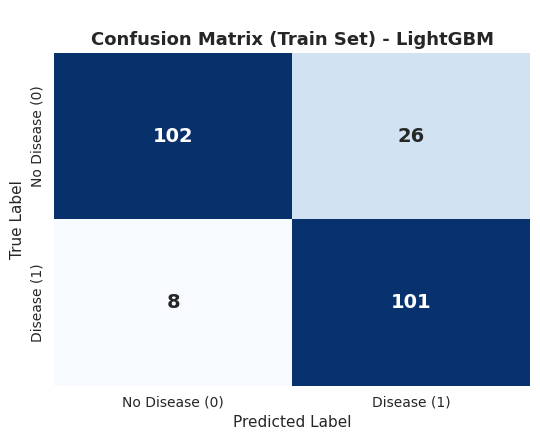

In [47]:
# LightGBM - Train Evaluation

import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, make_scorer
)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Custom Scorers
def specificity_score(y_true, y_pred):
    tn = ((y_true == 0) & (y_pred == 0)).sum()
    fp = ((y_true == 0) & (y_pred == 1)).sum()
    return tn / (tn + fp) if (tn + fp) > 0 else 0

def hybrid_score(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return 0.7 * recall + 0.3 * precision

hybrid_scorer = make_scorer(hybrid_score, greater_is_better=True)

# Cross-validation setup
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Updated Parameter grid to control overfitting
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.03],
    'max_depth': [2, 3],
    'num_leaves': [7, 15],
    'min_data_in_leaf': [20, 30],
    'min_gain_to_split': [0.0],
    'max_bin': [255],
    'reg_alpha': [0.1, 1.0],
    'reg_lambda': [0.1, 1.0]
}

# GridSearchCV with LightGBM
grid_search_lgb = GridSearchCV(
    estimator=lgb.LGBMClassifier(
        objective='binary',
        random_state=42,
        force_row_wise=True,
        verbosity=-1
    ),
    param_grid=param_grid,
    scoring=hybrid_scorer,
    cv=cv,
    n_jobs=-1,
    verbose=1
)
grid_search_lgb.fit(X_train_scaled, y_train)
best_lgb = grid_search_lgb.best_estimator_

print("Best Parameters for LightGBM:")
for key, val in grid_search_lgb.best_params_.items():
    print(f"   → {key}: {val}")

# Calibrate the model
calibrated_lgb = CalibratedClassifierCV(best_lgb, method='sigmoid', cv=5)
calibrated_lgb.fit(X_train_scaled, y_train)

# Get probabilities and compute best threshold (F1-optimized)
y_train_proba_lgb = calibrated_lgb.predict_proba(X_train_scaled)[:, 1]
thresholds = np.linspace(0, 1, 200)
f1_list = []

for t in thresholds:
    y_pred = (y_train_proba_lgb >= t).astype(int)
    f1_list.append(f1_score(y_train, y_pred, zero_division=0))

best_threshold = thresholds[np.argmax(f1_list)]
print(f"\nFinal Threshold Used (F1-Based): {best_threshold:.3f}")

# Final predictions
y_train_pred_lgb = (y_train_proba_lgb >= best_threshold).astype(int)
cm_train_lgb = confusion_matrix(y_train, y_train_pred_lgb)
TN, FP, FN, TP = cm_train_lgb.ravel()

# Metrics
train_accuracy_lgb = accuracy_score(y_train, y_train_pred_lgb)
train_precision_lgb = precision_score(y_train, y_train_pred_lgb)
train_recall_lgb = recall_score(y_train, y_train_pred_lgb)
train_specificity_lgb = specificity_score(y_train, y_train_pred_lgb)
train_f1_lgb = f1_score(y_train, y_train_pred_lgb)

# Save to results
results['LightGBM'] = {
    'Train Accuracy': train_accuracy_lgb,
    'Train Precision': train_precision_lgb,
    'Train Recall': train_recall_lgb,
    'Train Specificity': train_specificity_lgb,
    'Train F1 Score': train_f1_lgb,
    'Train Confusion Matrix': cm_train_lgb,
    'Threshold Used': best_threshold,
    'Best Parameters': grid_search_lgb.best_params_
}

# Display final metrics table
train_metrics_df_lgb = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [train_accuracy_lgb, train_precision_lgb, train_recall_lgb, train_specificity_lgb, train_f1_lgb]
})

print("\nTraining Set Evaluation for LightGBM:\n")
display(
    train_metrics_df_lgb.style
        .format({'Value': '{:.2%}'})
        .set_caption("Training Performance - LightGBM , (in %)")
        .background_gradient(cmap='Blues', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#cde6f9'), ('font-weight', 'bold')]},
        ])
)

# Plot Confusion Matrix
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_train_lgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\nConfusion Matrix (Train Set) - LightGBM',
          fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Test Set Evaluation for LightGBM:



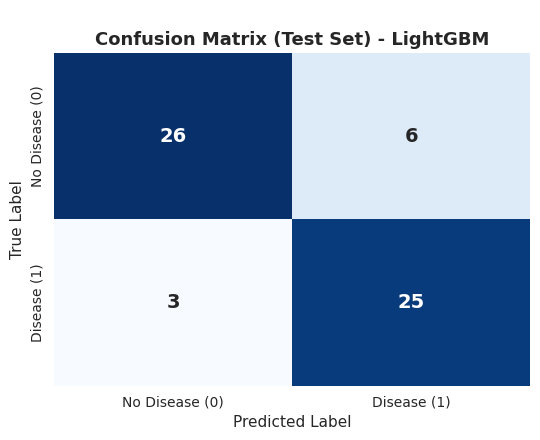

In [48]:
# LightGBM - Test Evaluation

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Predict probabilities on test set
y_test_proba_lgb = calibrated_lgb.predict_proba(X_test_scaled)[:, 1]

# Use best threshold from training phase
threshold = results['LightGBM']['Threshold Used']
y_test_pred_lgb = (y_test_proba_lgb >= threshold).astype(int)

# Confusion matrix
cm_test_lgb = confusion_matrix(y_test, y_test_pred_lgb)
TN, FP, FN, TP = cm_test_lgb.ravel()

# Metrics
test_accuracy_lgb = accuracy_score(y_test, y_test_pred_lgb)
test_precision_lgb = precision_score(y_test, y_test_pred_lgb)
test_recall_lgb = recall_score(y_test, y_test_pred_lgb)
test_specificity_lgb = TN / (TN + FP) if (TN + FP) > 0 else 0
test_f1_lgb = f1_score(y_test, y_test_pred_lgb)

# Save to results
results['LightGBM'].update({
    'Test Accuracy': test_accuracy_lgb,
    'Test Precision': test_precision_lgb,
    'Test Recall': test_recall_lgb,
    'Test Specificity': test_specificity_lgb,
    'Test F1 Score': test_f1_lgb,
    'Test Confusion Matrix': cm_test_lgb
})

# Display metrics as styled DataFrame
test_metrics_df_lgb = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [test_accuracy_lgb, test_precision_lgb, test_recall_lgb, test_specificity_lgb, test_f1_lgb]
})

print("Test Set Evaluation for LightGBM:\n")
display(
    test_metrics_df_lgb.style
        .format({'Value': '{:.2%}'})
        .set_caption("Test Performance - LightGBM , (in %)")
        .background_gradient(cmap='Blues', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#cde6f9'), ('font-weight', 'bold')]},
        ])
)

# Confusion Matrix Plot
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_test_lgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\nConfusion Matrix (Test Set) - LightGBM',
          fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [49]:
# Permutation Feature Importance for LightGBM (Train + Test) – All Metrics

from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, recall_score, precision_score, accuracy_score, f1_score, confusion_matrix
from IPython.display import display, Markdown, HTML
import pandas as pd
import numpy as np

# Float precision
pd.options.display.float_format = '{:.8f}'.format

# Custom specificity
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        return tn / (tn + fp) if (tn + fp) > 0 else 0
    return np.nan

# Convert scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Define evaluation metrics
scoring_metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score, zero_division=0),
    'Recall': make_scorer(recall_score, zero_division=0),
    'Specificity': make_scorer(specificity_score),
    'F1 Score': make_scorer(f1_score, zero_division=0)
}

# Color configuration for bar charts
importance_color_map = {
    'train': '#66bb6a',
    'test': '#42a5f5'
}

std_color_map = {
    'train': '#c8e6c9',
    'test': '#bbdefb'
}

zero_color = '#ff1744'
negative_color = '#d50000'

# Highlight formatting
def highlight_negative_or_zero(val):
    if np.isclose(val, 0.0, atol=1e-8):
        return f'color: {zero_color}'
    elif val < 0:
        return f'color: {negative_color}; font-weight: bold'
    return ''

# Storage dictionaries
perm_results_all = {}

# Loop over metrics
for metric_name, scorer in scoring_metrics.items():

    # Permutation – Train
    perm_train = permutation_importance(
        estimator=calibrated_lgb,
        X=X_train_df,
        y=y_train,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # Permutation – Test
    perm_test = permutation_importance(
        estimator=calibrated_lgb,
        X=X_test_df,
        y=y_test,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # DataFrames
    df_train = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': perm_train.importances_mean,
        'Std': perm_train.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    df_test = pd.DataFrame({
        'Feature': X_test.columns,
        'Importance': perm_test.importances_mean,
        'Std': perm_test.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # Save results
    perm_results_all[metric_name] = {'train': df_train, 'test': df_test}

    # Section title
    display(Markdown(f"## LightGBM – Permutation Feature Importances ({metric_name})"))

    # Train table
    train_html = (
        df_train.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['train'], vmin=0)
            .bar(subset='Std', color=std_color_map['train'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"LightGBM (Train) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Test table
    test_html = (
        df_test.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['test'], vmin=0)
            .bar(subset='Std', color=std_color_map['test'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"LightGBM (Test) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Show both tables
    html_output = f"""
    <div style="display: flex; gap: 50px;">
        <div>{train_html}</div>
        <div>{test_html}</div>
    </div>
    """
    display(HTML(html_output))

# Save it to master dictionary
all_models_perm_results['LightGBM'] = perm_results_all

## LightGBM – Permutation Feature Importances (Accuracy)

## LightGBM – Permutation Feature Importances (Precision)

## LightGBM – Permutation Feature Importances (Recall)

## LightGBM – Permutation Feature Importances (Specificity)

## LightGBM – Permutation Feature Importances (F1 Score)

VotingClassifier includes the following base models:
 - XGB: XGBClassifier
 - ADA: AdaBoostClassifier
 - SVM: CalibratedClassifierCV
Voting Type: SOFT
Number of Models Combined: 3
Calibration applied to: SVM (using sigmoid method)

Training Set Evaluation for VotingClassifier:



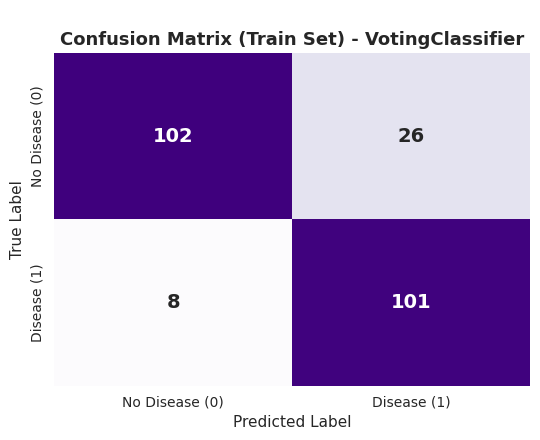

In [50]:
# VotingClassifier – Train Evaluation (xgb + ada + svm)

from sklearn.ensemble import VotingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Calibrate only SVM (MLP is not included in this best combination)
svm_calibrated = CalibratedClassifierCV(svm_model, method='sigmoid', cv=5)

# Define VotingClassifier with best-performing combination based on F1 Score
voting_model = VotingClassifier(
    estimators=[
        ('xgb', best_xgb),       # XGBoost - probabilistic
        ('ada', best_ada),       # AdaBoost - probabilistic
        ('svm', svm_calibrated)  # Calibrated SVM
    ],
    voting='soft',
    n_jobs=-1,
    verbose=1
)

# Train the VotingClassifier
voting_model.fit(X_train_scaled, y_train)

# Metadata (after fitting)
print("VotingClassifier includes the following base models:")
for name, estimator in voting_model.named_estimators_.items():
    model_type = type(estimator).__name__
    print(f" - {name.upper()}: {model_type}")

print(f"Voting Type: {voting_model.voting.upper()}")
print(f"Number of Models Combined: {len(voting_model.estimators)}")
print("Calibration applied to: SVM (using sigmoid method)\n")

# Predict on training data
y_train_pred_vote = voting_model.predict(X_train_scaled)

# Compute confusion matrix
cm_train_vote = confusion_matrix(y_train, y_train_pred_vote)
TN, FP, FN, TP = cm_train_vote.ravel()

# Calculate performance metrics
train_accuracy_vote = accuracy_score(y_train, y_train_pred_vote)
train_precision_vote = precision_score(y_train, y_train_pred_vote)
train_recall_vote = recall_score(y_train, y_train_pred_vote)
train_specificity_vote = TN / (TN + FP) if (TN + FP) > 0 else 0
train_f1_vote = f1_score(y_train, y_train_pred_vote)

# Save results
results['VotingClassifier'] = {
    'Train Accuracy': train_accuracy_vote,
    'Train Precision': train_precision_vote,
    'Train Recall': train_recall_vote,
    'Train Specificity': train_specificity_vote,
    'Train F1 Score': train_f1_vote,
    'Train Confusion Matrix': cm_train_vote
}

# Display performance metrics
train_metrics_df_vote = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [train_accuracy_vote, train_precision_vote, train_recall_vote, train_specificity_vote, train_f1_vote]
})

print("Training Set Evaluation for VotingClassifier:\n")
display(
    train_metrics_df_vote.style
        .format({'Value': '{:.2%}'})
        .set_caption("Training Performance - VotingClassifier , (in %)")
        .background_gradient(cmap='Purples', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#e6ccff'), ('font-weight', 'bold')]}
        ])
)

# Plot Confusion Matrix
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_train_vote, annot=True, fmt='d', cmap='Purples', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\nConfusion Matrix (Train Set) - VotingClassifier', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Test Set Evaluation for VotingClassifier:



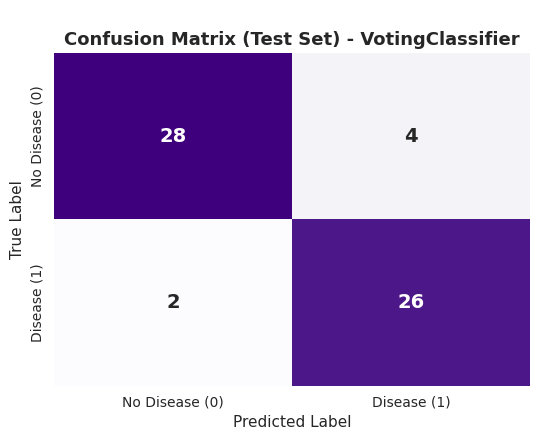

In [51]:
# VotingClassifier – Test Evaluation

# Predict on test data
y_test_pred_vote = voting_model.predict(X_test_scaled)

# Confusion matrix for test set
cm_test_vote = confusion_matrix(y_test, y_test_pred_vote)
TN_test, FP_test, FN_test, TP_test = cm_test_vote.ravel()

# Calculate test performance metrics
test_accuracy_vote = accuracy_score(y_test, y_test_pred_vote)
test_precision_vote = precision_score(y_test, y_test_pred_vote)
test_recall_vote = recall_score(y_test, y_test_pred_vote)
test_specificity_vote = TN_test / (TN_test + FP_test) if (TN_test + FP_test) > 0 else 0
test_f1_vote = f1_score(y_test, y_test_pred_vote)

# Save results
results['VotingClassifier'].update({
    'Test Accuracy': test_accuracy_vote,
    'Test Precision': test_precision_vote,
    'Test Recall': test_recall_vote,
    'Test Specificity': test_specificity_vote,
    'Test F1 Score': test_f1_vote,
    'Test Confusion Matrix': cm_test_vote
})

# Display test metrics
test_metrics_df_vote = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [test_accuracy_vote, test_precision_vote, test_recall_vote, test_specificity_vote, test_f1_vote]
})

print("Test Set Evaluation for VotingClassifier:\n")
display(
    test_metrics_df_vote.style
        .format({'Value': '{:.2%}'})
        .set_caption("Test Performance - VotingClassifier , (in %)")
        .background_gradient(cmap='Purples', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#e6ccff'), ('font-weight', 'bold')]}
        ])
)

# Plot Confusion Matrix for Test Set
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_test_vote, annot=True, fmt='d', cmap='Purples', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('\nConfusion Matrix (Test Set) - VotingClassifier', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [52]:
# Permutation Feature Importance for VotingClassifier (Train + Test) – All Metrics

from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, recall_score, precision_score, accuracy_score, f1_score, confusion_matrix
from IPython.display import display, Markdown, HTML
import pandas as pd
import numpy as np

# Float precision
pd.options.display.float_format = '{:.8f}'.format

# Custom specificity
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        return tn / (tn + fp) if (tn + fp) > 0 else 0
    return np.nan

# Convert scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Define evaluation metrics
scoring_metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score, zero_division=0),
    'Recall': make_scorer(recall_score, zero_division=0),
    'Specificity': make_scorer(specificity_score),
    'F1 Score': make_scorer(f1_score, zero_division=0)
}

# Color configuration for bar charts
importance_color_map = {
    'train': '#66bb6a',
    'test': '#42a5f5'
}

std_color_map = {
    'train': '#c8e6c9',
    'test': '#bbdefb'
}

zero_color = '#ff1744'
negative_color = '#d50000'

# Highlight formatting
def highlight_negative_or_zero(val):
    if np.isclose(val, 0.0, atol=1e-8):
        return f'color: {zero_color}'
    elif val < 0:
        return f'color: {negative_color}; font-weight: bold'
    return ''

# Storage dictionaries
perm_results_all = {}

# Loop over metrics
for metric_name, scorer in scoring_metrics.items():

    # Permutation – Train
    perm_train = permutation_importance(
        estimator=voting_model,
        X=X_train_df,
        y=y_train,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # Permutation – Test
    perm_test = permutation_importance(
        estimator=voting_model,
        X=X_test_df,
        y=y_test,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # DataFrames
    df_train = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': perm_train.importances_mean,
        'Std': perm_train.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    df_test = pd.DataFrame({
        'Feature': X_test.columns,
        'Importance': perm_test.importances_mean,
        'Std': perm_test.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # Save results
    perm_results_all[metric_name] = {'train': df_train, 'test': df_test}

    # Section title
    display(Markdown(f"## VotingClassifier – Permutation Feature Importances ({metric_name})"))

    # Train table
    train_html = (
        df_train.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['train'], vmin=0)
            .bar(subset='Std', color=std_color_map['train'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"VotingClassifier (Train) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Test table
    test_html = (
        df_test.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['test'], vmin=0)
            .bar(subset='Std', color=std_color_map['test'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"VotingClassifier (Test) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Show both tables
    html_output = f"""
    <div style="display: flex; gap: 50px;">
        <div>{train_html}</div>
        <div>{test_html}</div>
    </div>
    """
    display(HTML(html_output))

# Save it to master dictionary
all_models_perm_results['VotingClassifier'] = perm_results_all

## VotingClassifier – Permutation Feature Importances (Accuracy)

## VotingClassifier – Permutation Feature Importances (Precision)

## VotingClassifier – Permutation Feature Importances (Recall)

## VotingClassifier – Permutation Feature Importances (Specificity)

## VotingClassifier – Permutation Feature Importances (F1 Score)

StackingClassifier includes the following base models:
 - XGB: XGBClassifier
 - SVM: CalibratedClassifierCV
 - MLP: MLPClassifier
Meta-Learner: MLPClassifier
Voting Strategy: Stacked Predictions
Number of Base Models Combined: 3
Calibration applied to: SVM (using sigmoid method)

Training Set Evaluation for StackingClassifier:



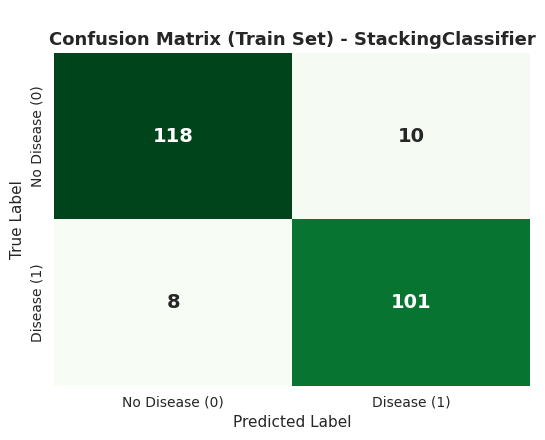

In [53]:
# StackingClassifier – Train Evaluation (xgb + svm + mlp)

from sklearn.ensemble import StackingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

# Calibrate only SVM (using sigmoid)
svm_calibrated = CalibratedClassifierCV(svm_model, method='sigmoid', cv=5)

# Define StackingClassifier with best-performing combination based on F1 Score
stacking_model = StackingClassifier(
    estimators=[
        ('xgb', best_xgb),
        ('svm', svm_calibrated),
        ('mlp', mlp_model)
    ],
    final_estimator=MLPClassifier(hidden_layer_sizes=(16,), max_iter=500, random_state=42),
    cv=15,
    n_jobs=-1,
    passthrough=True
)

# Train the StackingClassifier
stacking_model.fit(X_train_scaled, y_train)

# Metadata (after fitting)
print("StackingClassifier includes the following base models:")
for name, estimator in stacking_model.named_estimators_.items():
    model_type = type(estimator).__name__
    print(f" - {name.upper()}: {model_type}")

print(f"Meta-Learner: {type(stacking_model.final_estimator).__name__}")
print(f"Voting Strategy: Stacked Predictions")
print(f"Number of Base Models Combined: {len(stacking_model.estimators)}")
print("Calibration applied to: SVM (using sigmoid method)\n")

# Predict probabilities on training data
y_train_proba_stack = stacking_model.predict_proba(X_train_scaled)[:, 1]

# Threshold tuning based on F1
thresholds = np.arange(0.0, 1.01, 0.01)
f1_scores = []
metrics_by_thresh = []

for t in thresholds:
    preds = (y_train_proba_stack >= t).astype(int)
    acc = accuracy_score(y_train, preds)
    prec = precision_score(y_train, preds)
    rec = recall_score(y_train, preds)
    f1 = f1_score(y_train, preds)
    f1_scores.append(f1)
    metrics_by_thresh.append((t, acc, prec, rec, f1))

# Find best threshold
best_idx_train = np.argmax(f1_scores)
best_thresh_train = thresholds[best_idx_train]
best_metrics_train = metrics_by_thresh[best_idx_train]

# Final prediction using best threshold
y_train_pred_stack = (y_train_proba_stack >= best_thresh_train).astype(int)

# Compute confusion matrix
cm_train_stack = confusion_matrix(y_train, y_train_pred_stack)
TN, FP, FN, TP = cm_train_stack.ravel()

# Calculate performance metrics
train_accuracy_stack = best_metrics_train[1]
train_precision_stack = best_metrics_train[2]
train_recall_stack = best_metrics_train[3]
train_specificity_stack = TN / (TN + FP) if (TN + FP) > 0 else 0
train_f1_stack = best_metrics_train[4]

# Save results
results['StackingClassifier'] = {
    'Train Threshold': best_thresh_train,
    'Train Accuracy': train_accuracy_stack,
    'Train Precision': train_precision_stack,
    'Train Recall': train_recall_stack,
    'Train Specificity': train_specificity_stack,
    'Train F1 Score': train_f1_stack,
    'Train Confusion Matrix': cm_train_stack
}

# Display performance metrics
train_metrics_df_stack = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [train_accuracy_stack, train_precision_stack, train_recall_stack, train_specificity_stack, train_f1_stack]
})

print("Training Set Evaluation for StackingClassifier:\n")
display(
    train_metrics_df_stack.style
        .format({'Value': '{:.2%}'})
        .set_caption(f"Training Performance - StackingClassifier , (in %)")
        .background_gradient(cmap='Greens', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#ccffcc'), ('font-weight', 'bold')]}
        ])
)

# Plot Confusion Matrix
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_train_stack, annot=True, fmt='d', cmap='Greens', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title(f'\nConfusion Matrix (Train Set) - StackingClassifier',
          fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Test Set Evaluation for StackingClassifier:



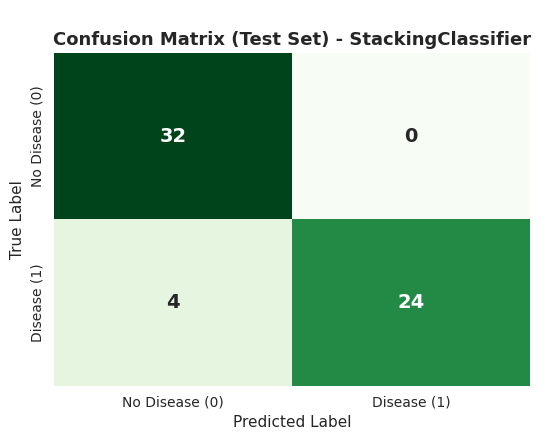

In [54]:
# StackingClassifier – Test Evaluation

# Predict on test data (probabilities)
y_test_proba_stack = stacking_model.predict_proba(X_test_scaled)[:, 1]

# Use best threshold from training phase
y_test_pred_stack = (y_test_proba_stack >= best_thresh_train).astype(int)

# Confusion matrix for test set
cm_test_stack = confusion_matrix(y_test, y_test_pred_stack)
TN_test, FP_test, FN_test, TP_test = cm_test_stack.ravel()

# Calculate test performance metrics
test_accuracy_stack = accuracy_score(y_test, y_test_pred_stack)
test_precision_stack = precision_score(y_test, y_test_pred_stack)
test_recall_stack = recall_score(y_test, y_test_pred_stack)
test_specificity_stack = TN_test / (TN_test + FP_test) if (TN_test + FP_test) > 0 else 0
test_f1_stack = f1_score(y_test, y_test_pred_stack)

# Save results
results['StackingClassifier'].update({
    'Test Threshold': best_thresh_train,
    'Test Accuracy': test_accuracy_stack,
    'Test Precision': test_precision_stack,
    'Test Recall': test_recall_stack,
    'Test Specificity': test_specificity_stack,
    'Test F1 Score': test_f1_stack,
    'Test Confusion Matrix': cm_test_stack
})

# Display test metrics
test_metrics_df_stack = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'],
    'Value': [test_accuracy_stack, test_precision_stack, test_recall_stack, test_specificity_stack, test_f1_stack]
})

print("Test Set Evaluation for StackingClassifier:\n")
display(
    test_metrics_df_stack.style
        .format({'Value': '{:.2%}'})
        .set_caption(f"Test Performance - StackingClassifier , (in %)")
        .background_gradient(cmap='Greens', subset=['Value'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#ccffcc'), ('font-weight', 'bold')]}
        ])
)

# Plot Confusion Matrix for Test Set
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm_test_stack, annot=True, fmt='d', cmap='Greens', cbar=False,
            annot_kws={"size": 14, "weight": "bold"},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title(f'\nConfusion Matrix (Test Set) - StackingClassifier',
          fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [55]:
# Permutation Feature Importance for StackingClassifier (Train + Test) – All Metrics

from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, recall_score, precision_score, accuracy_score, f1_score, confusion_matrix
from IPython.display import display, Markdown, HTML
import pandas as pd
import numpy as np

# Float precision
pd.options.display.float_format = '{:.8f}'.format

# Custom specificity
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        return tn / (tn + fp) if (tn + fp) > 0 else 0
    return np.nan

# Convert scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Define evaluation metrics
scoring_metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'Specificity': make_scorer(specificity_score),
    'F1 Score': make_scorer(f1_score)
}

# Color configuration for bar charts (like your XGBoost style)
importance_color_map = {
    'train': '#66bb6a',
    'test': '#42a5f5'
}

std_color_map = {
    'train': '#c8e6c9',
    'test': '#bbdefb'
}

zero_color = '#ff1744'
negative_color = '#d50000'

# Highlight formatting
def highlight_negative_or_zero(val):
    if np.isclose(val, 0.0, atol=1e-8):
        return f'color: {zero_color}'
    elif val < 0:
        return f'color: {negative_color}; font-weight: bold'
    return ''

# Storage dictionaries
perm_results_all = {}

# Loop over metrics
for metric_name, scorer in scoring_metrics.items():

    # Permutation – Train
    perm_train = permutation_importance(
        estimator=stacking_model,
        X=X_train_df,
        y=y_train,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # Permutation – Test
    perm_test = permutation_importance(
        estimator=stacking_model,
        X=X_test_df,
        y=y_test,
        n_repeats=100,
        random_state=42,
        scoring=scorer
    )

    # DataFrames
    df_train = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': perm_train.importances_mean,
        'Std': perm_train.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    df_test = pd.DataFrame({
        'Feature': X_test.columns,
        'Importance': perm_test.importances_mean,
        'Std': perm_test.importances_std
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # Save results
    perm_results_all[metric_name] = {'train': df_train, 'test': df_test}

    # Section title
    display(Markdown(f"## StackingClassifier – Permutation Feature Importances ({metric_name})"))

    # Train table
    train_html = (
        df_train.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['train'], vmin=0)
            .bar(subset='Std', color=std_color_map['train'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"StackingClassifier (Train) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Test table
    test_html = (
        df_test.style
            .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
            .bar(subset='Importance', color=importance_color_map['test'], vmin=0)
            .bar(subset='Std', color=std_color_map['test'], vmin=0)
            .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
            .set_caption(f"StackingClassifier (Test) – Feature Importances ({metric_name})")
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([{
                'selector': 'caption',
                'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
            }])
            .to_html()
    )

    # Show both tables
    html_output = f"""
    <div style="display: flex; gap: 50px;">
        <div>{train_html}</div>
        <div>{test_html}</div>
    </div>
    """
    display(HTML(html_output))

# Save it to master dictionary
all_models_perm_results['StackingClassifier'] = perm_results_all

## StackingClassifier – Permutation Feature Importances (Accuracy)

## StackingClassifier – Permutation Feature Importances (Precision)

## StackingClassifier – Permutation Feature Importances (Recall)

## StackingClassifier – Permutation Feature Importances (Specificity)

## StackingClassifier – Permutation Feature Importances (F1 Score)

Training Set Performance Summary:





 Testing Set Performance Summary:



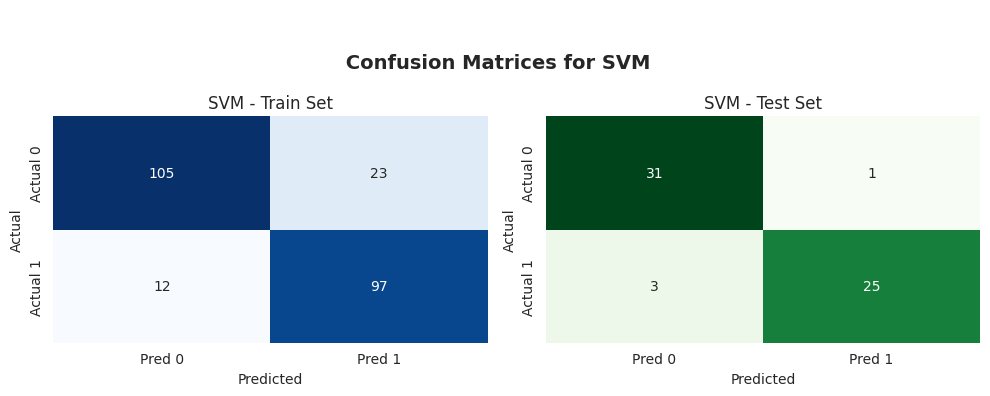

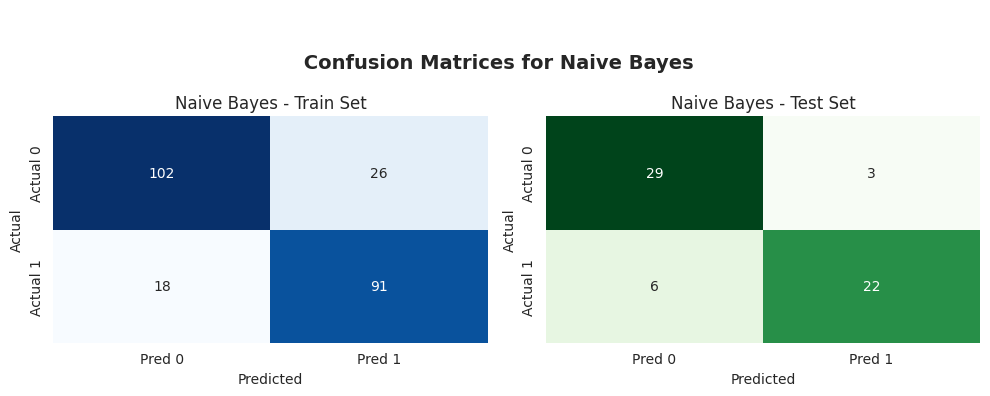

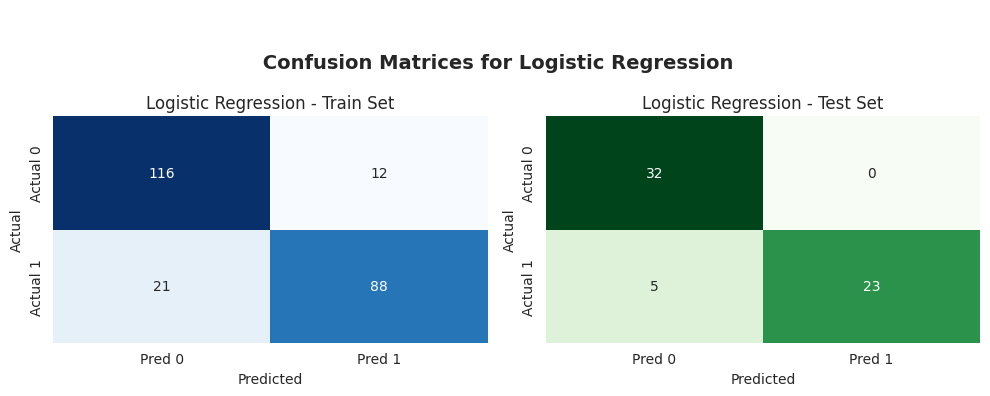

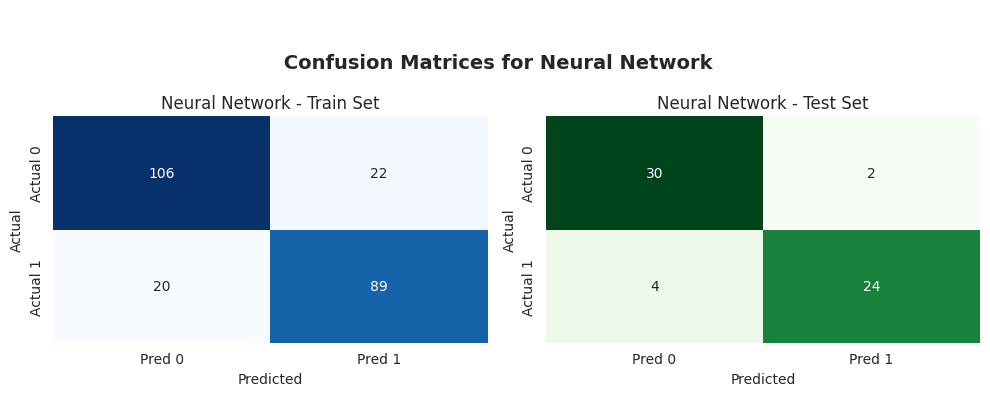

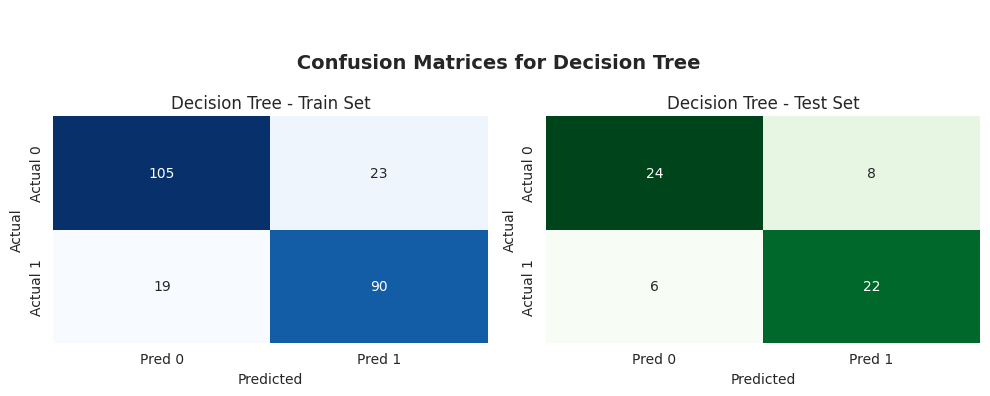

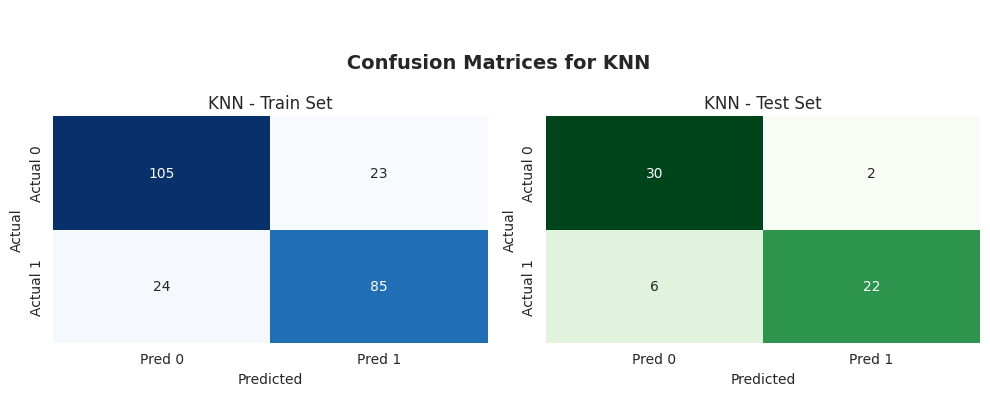

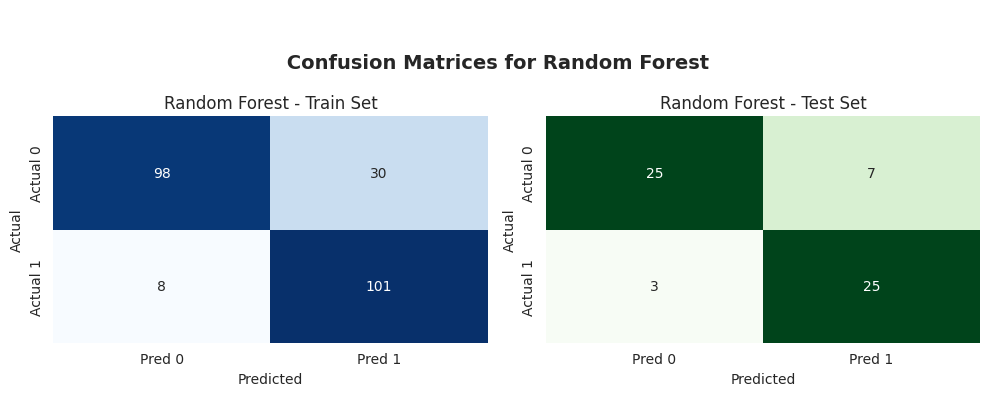

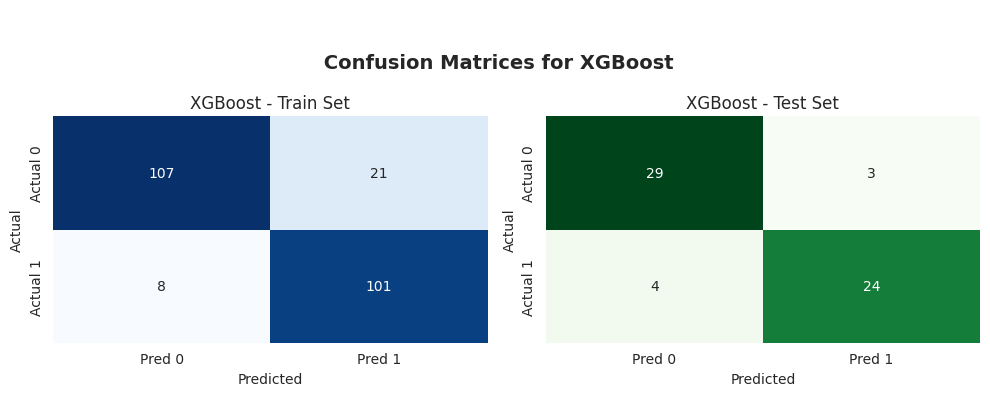

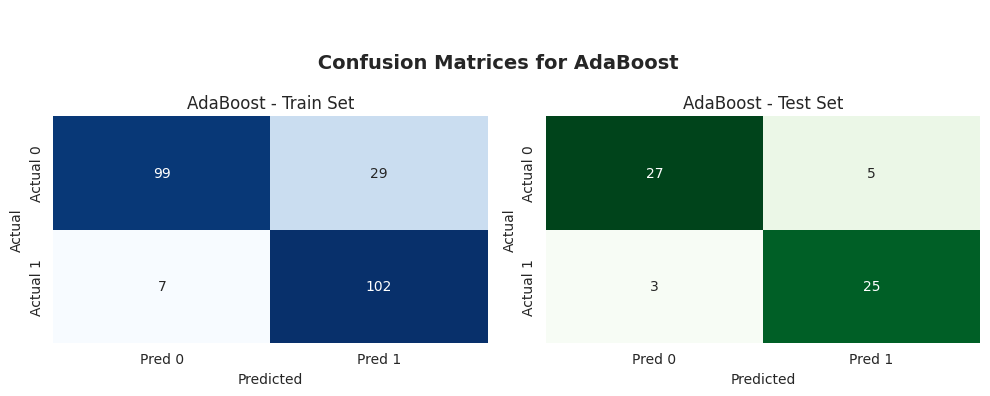

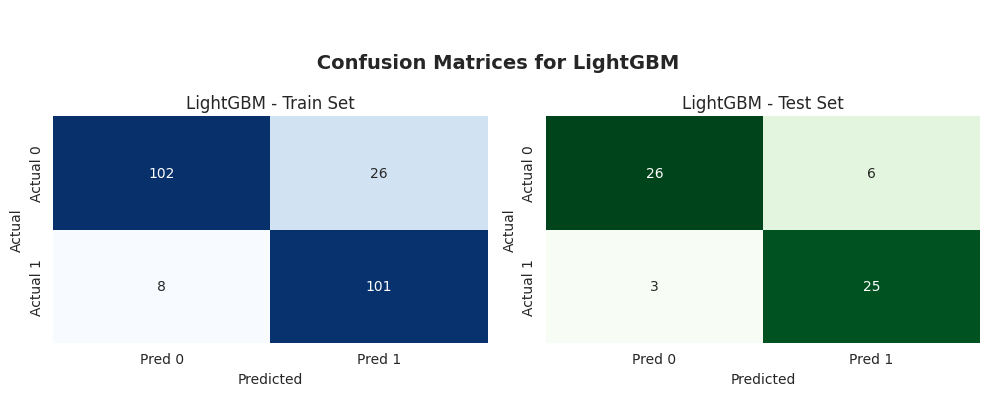

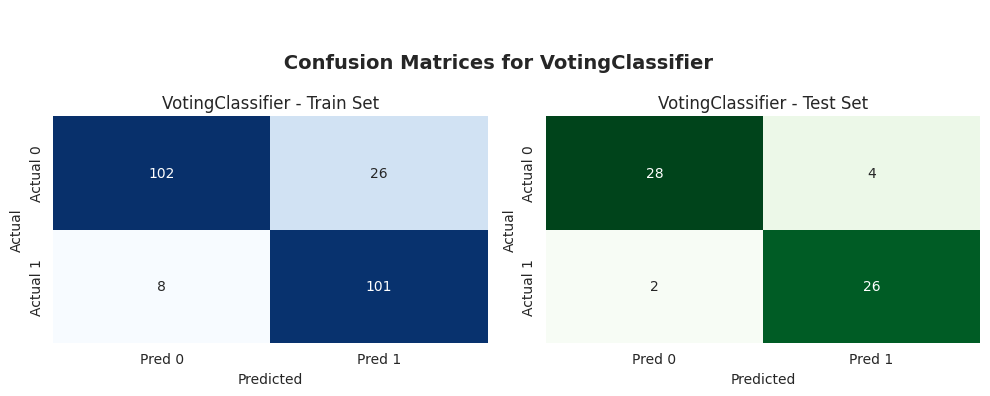

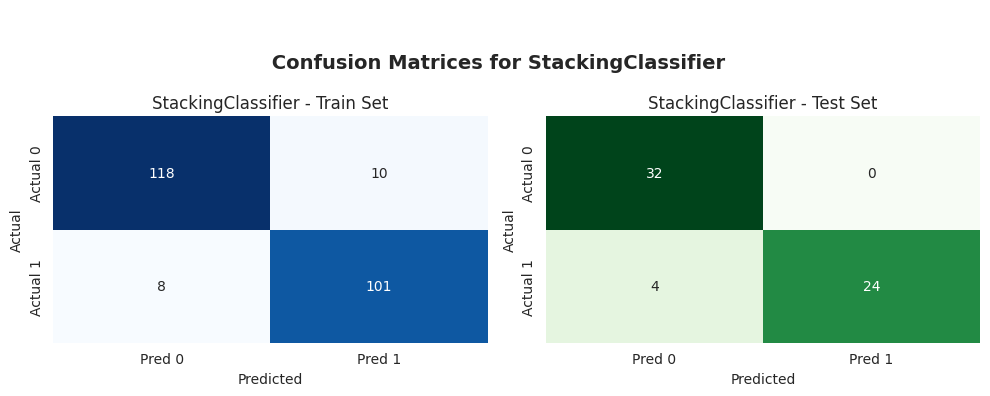

In [56]:
# Final Summary Report for All Models

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Safely convert to float for formatting
def safe_float(x):
    try:
        return float(x)
    except:
        return None

# List of all trained models
model_list = list(results.keys())

# Training metrics table
train_metrics_df = pd.DataFrame({
    'Model': model_list,
    'Accuracy': [safe_float(results[m]['Train Accuracy']) for m in model_list],
    'Precision': [safe_float(results[m]['Train Precision']) for m in model_list],
    'Recall': [safe_float(results[m]['Train Recall']) for m in model_list],
    'Specificity': [safe_float(results[m]['Train Specificity']) for m in model_list],
    'F1 Score': [safe_float(results[m]['Train F1 Score']) for m in model_list]
})

# Test metrics table
test_metrics_df = pd.DataFrame({
    'Model': model_list,
    'Accuracy': [safe_float(results[m]['Test Accuracy']) for m in model_list],
    'Precision': [safe_float(results[m]['Test Precision']) for m in model_list],
    'Recall': [safe_float(results[m]['Test Recall']) for m in model_list],
    'Specificity': [safe_float(results[m]['Test Specificity']) for m in model_list],
    'F1 Score': [safe_float(results[m]['Test F1 Score']) for m in model_list]
})

# Display styled training table
print("Training Set Performance Summary:\n")
display(
    train_metrics_df.style
        .format({col: '{:.2%}' for col in train_metrics_df.columns if col != 'Model'})
        .set_caption("Training Metrics (%)")
        .background_gradient(cmap='BuPu', subset=pd.IndexSlice[:, train_metrics_df.columns[1:]])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([{'selector': 'th', 'props': [('background-color', '#e0d9f8'), ('font-weight', 'bold')]}])
)

# Display styled test table
print("\n\n Testing Set Performance Summary:\n")
display(
    test_metrics_df.style
        .format({col: '{:.2%}' for col in test_metrics_df.columns if col != 'Model'})
        .set_caption("Test Metrics (%)")
        .background_gradient(cmap='YlOrBr', subset=pd.IndexSlice[:, test_metrics_df.columns[1:]])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([{'selector': 'th', 'props': [('background-color', '#ffe5b4'), ('font-weight', 'bold')]}])
)

# Plot confusion matrices side-by-side for each model
for model in model_list:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Training confusion matrix
    sns.heatmap(results[model]['Train Confusion Matrix'], annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'], ax=axes[0])
    axes[0].set_title(f'{model} - Train Set')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')

    # Test confusion matrix
    sns.heatmap(results[model]['Test Confusion Matrix'], annot=True, fmt='d', cmap='Greens', cbar=False,
                xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'], ax=axes[1])
    axes[1].set_title(f'{model} - Test Set')
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('Actual')

    # Global title
    plt.suptitle(f'\n\n Confusion Matrices for {model}', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

In [57]:
import pandas as pd
from IPython.display import display

def rank_metrics_dense(df: pd.DataFrame, cmap: str, caption: str, header_bg: str):
    # Make a deep copy of the dataframe for safe processing
    ranked_df = df.copy()

    # Extract only the metric columns (excluding 'Model')
    metric_columns = ranked_df.columns.drop('Model')

    # Clean and convert data to float
    for col in metric_columns:
        # Remove '%' if present
        if ranked_df[col].dtype == 'object':
            ranked_df[col] = ranked_df[col].str.replace('%', '', regex=False)
        # Convert to float (handle errors by coercing to NaN)
        ranked_df[col] = pd.to_numeric(ranked_df[col], errors='coerce')

    # Compute dense rank for each metric (1 = best, handles ties properly)
    for col in metric_columns:
        ranked_df[f"{col} Rank"] = ranked_df[col].rank(method='dense', ascending=False).astype(int)

    # Keep only the final columns: 'Model' and rank columns
    final_columns = ['Model'] + [f"{col} Rank" for col in metric_columns]
    ranked_df = ranked_df[final_columns]

    # Style the dataframe for a colorful and bold display
    styled = (
        ranked_df.style
            .set_caption(caption)
            .background_gradient(cmap=cmap, subset=pd.IndexSlice[:, ranked_df.columns[1:]])
            .set_properties(**{'text-align': 'center', 'font-weight': 'bold'})
            .set_table_styles([
                {'selector': 'th', 'props': [('background-color', header_bg),
                                             ('text-align', 'center'),
                                             ('font-weight', 'bold')]},
            ])
    )

    return styled

# ---------- Display train metric dense ranking ---------- #
print("Train Metric Rankings:\n")
styled_train_dense = rank_metrics_dense(
    train_metrics_df,
    cmap='BuPu_r',
    caption="Train Metric Rankings (1 = Best)",
    header_bg='#e0d9f8'
)
display(styled_train_dense)

# ---------- Display test metric dense ranking ---------- #
print("\nTest Metric Rankings:\n")
styled_test_dense = rank_metrics_dense(
    test_metrics_df,
    cmap='YlOrBr_r',
    caption="Test Metric Rankings (1 = Best)",
    header_bg='#ffe5b4'
)
display(styled_test_dense)

Train Metric Rankings:




Test Metric Rankings:



In [58]:
import pandas as pd
from IPython.display import display, Markdown, HTML

# Scientific Weights for Medical Applications
weights = {
    "Recall": 0.35,
    "F1 Score": 0.30,
    "Specificity": 0.15,
    "Precision": 0.10,
    "Accuracy": 0.10
}

# Spacer before formula
display(HTML("<br>"))

# Display the scientific formula first
display(Markdown("### Scientific Scoring Formula for Medical Models"))
display(Markdown(r"""
**Scientific Score** = `0.35 × Recall` + `0.30 × F1 Score` + `0.15 × Specificity` + `0.10 × Precision` + `0.10 × Accuracy`
"""))

# Spacer before training results
display(HTML("<br>"))

# Ranking function with reverse colormap (dark = better score)
def scientific_ranking(df: pd.DataFrame, caption: str, cmap: str, header_color: str):
    df = df.copy()
    df["Scientific Score"] = (
        df["Recall"] * weights["Recall"] +
        df["F1 Score"] * weights["F1 Score"] +
        df["Specificity"] * weights["Specificity"] +
        df["Precision"] * weights["Precision"] +
        df["Accuracy"] * weights["Accuracy"]
    )
    df["Rank"] = df["Scientific Score"].rank(ascending=False).astype(int)
    df_sorted = df.sort_values("Rank").reset_index(drop=True)

    styled = (
        df_sorted.style
        .format({
            "Accuracy": "{:.2%}",
            "Precision": "{:.2%}",
            "Recall": "{:.2%}",
            "Specificity": "{:.2%}",
            "F1 Score": "{:.2%}",
            "Scientific Score": "{:.2%}"
        })
        .set_caption(caption)
        .background_gradient(cmap=cmap, subset=["Scientific Score"])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            {'selector': 'th',
             'props': [('background-color', header_color),
                       ('color', 'black'),
                       ('font-weight', 'bold'),
                       ('text-align', 'center')]},
        ])
    )
    return styled

# Spacer before training table
display(HTML("<br>"))

# Display Training Set Results
display(scientific_ranking(
    train_metrics_df,
    caption="Scientific Model Ranking Based on Training Set",
    cmap='BuPu',
    header_color='#dcd6f7'
))

# Spacer between tables
display(HTML("<br>"))

# Display Testing Set Results
display(scientific_ranking(
    test_metrics_df,
    caption="Scientific Model Ranking Based on Testing Set",
    cmap='YlOrBr',
    header_color='#ffe5b4'
))

# Final spacing
display(HTML("<br>"))

### Scientific Scoring Formula for Medical Models


**Scientific Score** = `0.35 × Recall` + `0.30 × F1 Score` + `0.15 × Specificity` + `0.10 × Precision` + `0.10 × Accuracy`


In [59]:
# Final Display of Permutation Feature Importances – All Models and All Metrics

from IPython.display import display, Markdown, HTML

# Loop over each model and its metrics
for model_name, metrics_dict in all_models_perm_results.items():
    for metric_name, result in metrics_dict.items():

        # Extract Train and Test DataFrames
        df_train = result['train'].copy()
        df_test = result['test'].copy()

        # Display section title
        display(Markdown(f"## {model_name} – Permutation Feature Importances ({metric_name})"))

        # Function to style and return HTML table
        def style_df(df, dataset_type):
            return (
                df.style
                    .format({'Importance': '{:.8f}', 'Std': '{:.8f}'})
                    .bar(subset='Importance', color=importance_color_map[dataset_type], vmin=0)
                    .bar(subset='Std', color=std_color_map[dataset_type], vmin=0)
                    .applymap(highlight_negative_or_zero, subset=['Importance', 'Std'])
                    .set_caption(f"{model_name} ({dataset_type.capitalize()}) – Feature Importances ({metric_name})")
                    .set_properties(**{'text-align': 'center'})
                    .set_table_styles([{
                        'selector': 'caption',
                        'props': [('caption-side', 'top'), ('font-size', '15px'), ('font-weight', 'bold')]
                    }])
                    .to_html()
            )

        # Style tables
        train_html = style_df(df_train, 'train')
        test_html = style_df(df_test, 'test')

        # Display side-by-side
        html_block = f"""
        <div style="display: flex; gap: 50px; margin-bottom: 40px;">
            <div>{train_html}</div>
            <div>{test_html}</div>
        </div>
        """
        display(HTML(html_block))

## SVM – Permutation Feature Importances (Accuracy)

## SVM – Permutation Feature Importances (Precision)

## SVM – Permutation Feature Importances (Recall)

## SVM – Permutation Feature Importances (Specificity)

## SVM – Permutation Feature Importances (F1 Score)

## Naive Bayes – Permutation Feature Importances (Accuracy)

## Naive Bayes – Permutation Feature Importances (Precision)

## Naive Bayes – Permutation Feature Importances (Recall)

## Naive Bayes – Permutation Feature Importances (Specificity)

## Naive Bayes – Permutation Feature Importances (F1 Score)

## Logistic Regression – Permutation Feature Importances (Accuracy)

## Logistic Regression – Permutation Feature Importances (Precision)

## Logistic Regression – Permutation Feature Importances (Recall)

## Logistic Regression – Permutation Feature Importances (Specificity)

## Logistic Regression – Permutation Feature Importances (F1 Score)

## Neural Network – Permutation Feature Importances (Accuracy)

## Neural Network – Permutation Feature Importances (Precision)

## Neural Network – Permutation Feature Importances (Recall)

## Neural Network – Permutation Feature Importances (Specificity)

## Neural Network – Permutation Feature Importances (F1 Score)

## Decision Tree – Permutation Feature Importances (Accuracy)

## Decision Tree – Permutation Feature Importances (Precision)

## Decision Tree – Permutation Feature Importances (Recall)

## Decision Tree – Permutation Feature Importances (Specificity)

## Decision Tree – Permutation Feature Importances (F1 Score)

## KNN – Permutation Feature Importances (Accuracy)

## KNN – Permutation Feature Importances (Precision)

## KNN – Permutation Feature Importances (Recall)

## KNN – Permutation Feature Importances (Specificity)

## KNN – Permutation Feature Importances (F1 Score)

## Random Forest – Permutation Feature Importances (Accuracy)

## Random Forest – Permutation Feature Importances (Precision)

## Random Forest – Permutation Feature Importances (Recall)

## Random Forest – Permutation Feature Importances (Specificity)

## Random Forest – Permutation Feature Importances (F1 Score)

## XGBoost – Permutation Feature Importances (Accuracy)

## XGBoost – Permutation Feature Importances (Precision)

## XGBoost – Permutation Feature Importances (Recall)

## XGBoost – Permutation Feature Importances (Specificity)

## XGBoost – Permutation Feature Importances (F1 Score)

## AdaBoost – Permutation Feature Importances (Accuracy)

## AdaBoost – Permutation Feature Importances (Precision)

## AdaBoost – Permutation Feature Importances (Recall)

## AdaBoost – Permutation Feature Importances (Specificity)

## AdaBoost – Permutation Feature Importances (F1 Score)

## LightGBM – Permutation Feature Importances (Accuracy)

## LightGBM – Permutation Feature Importances (Precision)

## LightGBM – Permutation Feature Importances (Recall)

## LightGBM – Permutation Feature Importances (Specificity)

## LightGBM – Permutation Feature Importances (F1 Score)

## VotingClassifier – Permutation Feature Importances (Accuracy)

## VotingClassifier – Permutation Feature Importances (Precision)

## VotingClassifier – Permutation Feature Importances (Recall)

## VotingClassifier – Permutation Feature Importances (Specificity)

## VotingClassifier – Permutation Feature Importances (F1 Score)

## StackingClassifier – Permutation Feature Importances (Accuracy)

## StackingClassifier – Permutation Feature Importances (Precision)

## StackingClassifier – Permutation Feature Importances (Recall)

## StackingClassifier – Permutation Feature Importances (Specificity)

## StackingClassifier – Permutation Feature Importances (F1 Score)

In [60]:
# Save Final Models, Scaler, and Feature Names

import joblib
import os

# Define and create the directory
save_dir = "saved_models"
os.makedirs(save_dir, exist_ok=True)

# Save all 12 models
joblib.dump(svm_model, os.path.join(save_dir, "svm.pkl"))                 # Support Vector Machine
joblib.dump(nb_model, os.path.join(save_dir, "naive_bayes.pkl"))         # Naive Bayes
joblib.dump(best_model_lr, os.path.join(save_dir, "logistic_regression.pkl"))  # Logistic Regression
joblib.dump(mlp_model, os.path.join(save_dir, "mlp.pkl"))                # Multi-Layer Perceptron
joblib.dump(best_tree, os.path.join(save_dir, "decision_tree.pkl"))     # Decision Tree
joblib.dump(best_knn, os.path.join(save_dir, "knn.pkl"))                # K-Nearest Neighbors
joblib.dump(calibrated_rf, os.path.join(save_dir, "random_forest.pkl")) # Random Forest
joblib.dump(calibrated_xgb, os.path.join(save_dir, "xgboost.pkl"))      # XGBoost
joblib.dump(calibrated_ada, os.path.join(save_dir, "adaboost.pkl"))     # AdaBoost
joblib.dump(calibrated_lgb, os.path.join(save_dir, "lightgbm.pkl"))     # LightGBM
joblib.dump(voting_model, os.path.join(save_dir, "voting.pkl"))         # Voting Classifier
joblib.dump(stacking_model, os.path.join(save_dir, "stacking.pkl"))     # Stacking Classifier

print("All 12 models saved in 'saved_models/'.")

# Save the fitted StandardScaler used for normalization
joblib.dump(scaler, os.path.join(save_dir, "scaler.pkl"))

# Save the exact column names used in the model (after One-Hot Encoding)
encoder_columns = X.columns.tolist()
joblib.dump(encoder_columns, os.path.join(save_dir, "encoder_columns.pkl"))

print("Scaler and feature names saved successfully.")

All 12 models saved in 'saved_models/'.
Scaler and feature names saved successfully.


In [62]:
import shutil
from google.colab import files

# Create zip file
shutil.make_archive("saved_models", 'zip', "saved_models")

# Print message
print("The ZIP file has been created successfully.")
print("Your download should begin shortly...")

# Trigger download
files.download("saved_models.zip")

The ZIP file has been created successfully.
Your download should begin shortly...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>